# <font color = violet>Telecom_Churn Case Study</font>
######  <font color = green> By --> Himanshu & Raoof </font>

### 1. Data Reading and Understanding

#### 1.1 Importing libraries

In [1]:
# Supressing the warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all relevant libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Making sure that we see all rows and columns, since in newer editions python does not show all data by default

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [4]:
# Resetting the seaborn style 

sns.reset_orig()

#### 1.2 Reading the data and checking its metrics 

In [5]:
# Loading and reading the top 5 rows of dataset

tele_df = pd.read_csv('telecom_churn_data.csv')
tele_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [6]:
# Checking the shape of dataset

tele_df.shape

(99999, 226)

In [7]:
# Checking the columns of dataset

tele_df.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [8]:
# Checking the columns-wise summary of dataset

tele_df.info(verbose = True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  float64
 14  onnet

All columns preliminary seem to have correct data types associated with them.

In [9]:
# Checking the statical summary of all numeric columns
         
tele_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

we can observe here that for certain columns the minimum value is `1` and not `0`, these columns demand further inspection.

From the summary above it can be noted that all the values are within `acceptable region` and thus `passes the sanity check`

In [10]:
# Checking for duplicate rows in our dataset

sum(tele_df.duplicated())

0

There are no duplicate values present in our dataset

### 2. Data Cleaning and Analysis 

#### 2.1 Dealing with Missing data   A.K.A   Null values for columns 

##### 2.1.1 Imputing NaN with 0 for certain columns based upon preliminary inspection 

In [11]:
# Checking percentage of Null values present in each column by making custom function

def c_null(x):
    
    null = (((x.isnull().sum())*100)/x.shape[0]).sort_values(ascending = False) # Saving all values in a variable 

    return(null[null > 0]) # Printing percentage of Null values present in each column if it is greater than 0

In [12]:
c_null(tele_df)  # Calling our function

count_rech_2g_6             74.846748
date_of_last_rech_data_6    74.846748
count_rech_3g_6             74.846748
av_rech_amt_data_6          74.846748
max_rech_data_6             74.846748
total_rech_data_6           74.846748
arpu_3g_6                   74.846748
arpu_2g_6                   74.846748
night_pck_user_6            74.846748
fb_user_6                   74.846748
arpu_3g_7                   74.428744
count_rech_2g_7             74.428744
fb_user_7                   74.428744
count_rech_3g_7             74.428744
arpu_2g_7                   74.428744
av_rech_amt_data_7          74.428744
max_rech_data_7             74.428744
night_pck_user_7            74.428744
total_rech_data_7           74.428744
date_of_last_rech_data_7    74.428744
night_pck_user_9            74.077741
date_of_last_rech_data_9    74.077741
fb_user_9                   74.077741
arpu_2g_9                   74.077741
max_rech_data_9             74.077741
arpu_3g_9                   74.077741
total_rech_d

As we can see from above that `there are null values` present, so we will deal with them.

When we look closely at data description we can find there are customers who have not done any transactions in any subsequent month, and they are therefore not recorded, as a result N.A is displayed in their place, so imputation would not be an ideal way to deal with such cases rather we will replace all those type of values by 0. 

While doing data description we saw certain columns with minimum values as `1` (0.5 in case of some columns) rather than `0`, these columns fits into the above scenario and the null values there needs to be replaced with 0.

These columns are,
            
    total_rech_data_6, total_rech_data_7, total_rech_data_8, total_rech_data_9, max_rech_data_6, max_rech_data_7, 
    max_rech_data_8, max_rech_data_9, av_rech_amt_data_6, av_rech_amt_data_7, av_rech_amt_data_8, and 
    av_rech_amt_data_9

Now we will replace NaN values with 0 for these columns.

In [13]:
# Making list of all columns where we will replace NaN with 0

l = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
     'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9','av_rech_amt_data_6',
     'av_rech_amt_data_7', 'av_rech_amt_data_8' ,'av_rech_amt_data_9']

Also there are certain columns like `fb_user` which holds a large number of NaN values but could prove to be essential when building a model after filtering out high value customers so it is imperative that we replace NaN by 0 for further analysis  

In [14]:
# Extending our list to inlcude more columns

l.extend(['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
          'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8','night_pck_user_6','night_pck_user_7',
          'night_pck_user_8','fb_user_6','fb_user_7','fb_user_8','count_rech_2g_9','count_rech_3g_9','night_pck_user_9',
          'arpu_3g_9','fb_user_9','arpu_2g_9'])

In [15]:
tele_df[l].describe()  # Checking descriptive summary before we make changes

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,count_rech_2g_9,count_rech_3g_9,night_pck_user_9,arpu_3g_9,fb_user_9,arpu_2g_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25153.000000,25571.000000,26339.000000,25153.000000,25571.000000,26339.000000,25153.000000,25571.000000,26339.000000,25153.000000,25571.000000,26339.000000,25153.000000,25571.000000,26339.000000,25922.000000,25922.000000,25922.000000,25922.000000,25922.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315,1.864668,2.044699,2.016288,0.599133,0.621720,0.635711,89.555057,89.384120,91.173849,86.398003,85.914450,86.599478,0.025086,0.023034,0.020844,0.914404,0.908764,0.890808,1.781807,0.659363,0.015971,100.264116,0.860968,93.712026
std,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286,2.570254,2.768332,2.720132,1.274428,1.394524,1.422827,193.124653,195.893924,188.180936,172.767523,176.379871,168.247852,0.156391,0.150014,0.142863,0.279772,0.287950,0.311885,2.214701,1.411513,0.125366,216.291992,0.345987,171.384224
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-30.820000,-26.040000,-24.490000,-35.830000,-15.480000,-55.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-71.090000,0.000000,-45.740000
25%,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.480000,0.420000,0.880000,10.830000,8.810000,9.270000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.605000,1.000000,14.800000
75%,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,122.070000,119.560000,122.070000,122.070000,122.070000,122.070000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,140.010000,1.000000,140.010000
max,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000,42.000000,48.000000,44.000000,29.000000,35.000000,45.000000,6362.280000,4980.900000,3716.900000,6433.760000,4809.360000,3483.170000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,40.000000,49.000000,1.000000,13884.310000,1.000000,3467.170000


In [16]:
# Now we will replace NaN with 0 for all columns in list

tele_df[l] = tele_df[l].replace(np.NaN,0)

In [17]:
tele_df[l].describe()  # Checking descriptive summary again to ascertain the changes we made

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,count_rech_2g_9,count_rech_3g_9,night_pck_user_9,arpu_3g_9,fb_user_9,arpu_2g_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.00000,99999.000000,99999.000000,99999.000000
mean,0.619726,0.681837,0.698517,0.632806,31.792048,32.406314,33.113011,32.387644,48.445409,51.393440,52.027022,49.961089,0.469025,0.522855,0.531075,0.150702,0.158982,0.167442,22.526009,22.856642,24.014520,21.731907,21.969404,22.809665,0.006310,0.005890,0.005490,0.230002,0.232382,0.234632,0.461885,0.170922,0.00414,25.990724,0.223182,24.292274
std,1.760541,1.924382,1.963417,1.669040,77.248778,78.342435,78.872739,78.818696,127.743863,132.629365,131.182609,127.804280,1.521915,1.659925,1.654565,0.689999,0.755537,0.782059,104.360309,106.457258,104.593649,94.408718,96.746052,94.396902,0.079185,0.076521,0.073892,0.420836,0.422354,0.423771,1.371526,0.774557,0.06421,118.562650,0.416382,96.437504
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-30.820000,-26.040000,-24.490000,-35.830000,-15.480000,-55.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-71.090000,0.000000,-45.740000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,8.000000,14.000000,17.000000,17.000000,8.250000,17.000000,23.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.000000,7546.000000,4365.000000,4076.000000,4061.000000,42.000000,48.000000,44.000000,29.000000,35.000000,45.000000,6362.280000,4980.900000,3716.900000,6433.760000,4809.360000,3483.170000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,40.000000,49.000000,1.00000,13884.310000,1.000000,3467.170000


As we can see our code works perfectly, Now we will impute NaN values using Traditional methods, i.e. Mode for Categorical columns and median for Numerical ones but before we attempt that we need to filter out high value customers.

In [18]:
c_null(tele_df)   # Calling our function to check percentage of null values

date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_9    74.077741
date_of_last_rech_data_8    73.660737
std_ic_t2f_mou_9             7.745077
loc_og_mou_9                 7.745077
std_ic_t2o_mou_9             7.745077
loc_og_t2t_mou_9             7.745077
loc_og_t2m_mou_9             7.745077
std_og_mou_9                 7.745077
og_others_9                  7.745077
loc_og_t2f_mou_9             7.745077
loc_og_t2c_mou_9             7.745077
spl_ic_mou_9                 7.745077
std_og_t2t_mou_9             7.745077
isd_ic_mou_9                 7.745077
roam_ic_mou_9                7.745077
std_og_t2m_mou_9             7.745077
ic_others_9                  7.745077
std_og_t2f_mou_9             7.745077
spl_og_mou_9                 7.745077
std_og_t2c_mou_9             7.745077
isd_og_mou_9                 7.745077
roam_og_mou_9                7.745077
std_ic_mou_9                 7.745077
std_ic_t2t_mou_9             7.745077
loc_ic_mou_9

#### 2.2 Extracting High value customers

There is an economical fact the every service based company in Indian market have about 25-30 percent high value customers which are responsible for much of the revenue generated by the company so it makes more sense to target those 30 percent customers

We will now filter out those customers

Our selection criteria would simply be to specify a cutoff such that 70 percentile of customers fall below the said threshold in terms of total amount of recharge done in months 6 and 7 i.e the good phase

######  Steps for deriving a new metric `TOTAL AMOUNT OF RECHARGE IN GOOD PHASE`

To derive this new metric what we will do is, 
1. for months 6,7, and 8 i.e good and action phases respectively, we will `add` the `number of times` both `2g` and `3g` recharges were done,
2. Then `multiply` this data count quantity by `average amount of data recharges` done in respective months,
3. Then we will `add` this `data amount` to the `total recharge amount` and call the result as `total amount` for that particular month,
4. Finally we will find the `average` of the `total amounts for months 6 and 7` and call it `total good phase average amount` and call the month 8 amount as `total action phase amount`.

The reason for taking average for months 6 and 7 is to have our new metric on same scale as for month 8 which would help us in further analysis. 

In [19]:
tele_df.head(1)  # Checking before deriving the new metric

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.1,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,5.44,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,2

In [20]:
# Now we will follow the above discussed steps

for i in [6,7,8]:

# Step 1

    tele_df[f'total_data_cnt_{i}'] = (tele_df[f'count_rech_2g_{i}'] + tele_df[f'count_rech_3g_{i}']).astype(int)
    
# Step 2

    tele_df[f'total_data_amt_{i}'] = (tele_df[f'total_data_cnt_{i}'] * tele_df[f'av_rech_amt_data_{i}'])
    
# Step 3

    tele_df[f'total_mnth_{i}'] = (tele_df[f'total_data_amt_{i}'] + tele_df[f'total_rech_amt_{i}'])
    
# Step 4

tele_df['good_phase_avg'] = ( tele_df['total_mnth_6'] + tele_df['total_mnth_7'] ) / 2 

In [21]:
tele_df.head(1)  # Checking after deriving the new metric

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_cnt_6,total_data_amt_6,total_mnth_6,total_data_cnt_7,total_data_amt_7,total_mnth_7,total_data_cnt_8,total_data_amt_8,total_mnth_8,good_phase_avg
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.1,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.0,NaN,NaN,

<font color = red><b>
These are the new metrics which we have derived just now -:

1. `total_data_cnt`  : total number of times 2g and 3g recharges were done
   
2. `total_data_amt`  : total amount of recharge done for data services
   
3. `total_mnth`      : total amount of recharge done for both data and call services

4. `good_phase_avg`  : average amount of recharge done for both data and call services during the good phase
</b></font>

We have successfully derived the new metrics now we will filter out High value customers based upon 70th percentile.

######  Storing the dataset containing top 30 percent of customers in another data frame

In [22]:
# Specifying the cutoff at 70th percentile of average amount of rechrage done in good phase

cutoff =  np.percentile(tele_df['good_phase_avg'], 70.0)  

In [23]:
cutoff   # Checking the value of cutoff

478.0

In [24]:
# Ectracting all cutomers equal to or above the cutoff

hvc_df = tele_df[tele_df['good_phase_avg'] > cutoff]

In [25]:
hvc_df.head() # Checking head after extraction

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_cnt_6,total_data_amt_6,total_mnth_6,total_data_cnt_7,total_data_amt_7,total_mnth_7,total_data_cnt_8,total_data_amt_8,total_mnth_8,good_phase_avg
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN

In [26]:
hvc_df.shape # Checking shape after extraction

(29953, 236)

We can notice that the extraction has been successful. 

#### 2.3 Deriving the target variable

Since we are not provided with any past direct target variable feature, we would need to make our custom one using the 9th month information, as specified by problem statement that it is the month wherein the customer has either already churned or has not, and is called as `churn phase`.

Using the following attributes we will accomplish the above task

    total_ic_mou_9,
    total_og_mou_9,
    vol_2g_mb_9, and
    vol_3g_mb_9
As per problem statement, `tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.` and same we will do.

From our previous null value analysis we know that all these features do not contain any null values.

In [27]:
# Deriving the target variable

hvc_df['churn'] = np.where(hvc_df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)

In [28]:
hvc_df.head()   # Checking the head to ascertain the changes we made

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_cnt_6,total_data_amt_6,total_mnth_6,total_data_cnt_7,total_data_amt_7,total_mnth_7,total_data_cnt_8,total_data_amt_8,total_mnth_8,good_phase_avg,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.

In [29]:
hvc_df['churn'].value_counts(normalize = True)*100   # Checking composition of values in our target variable

0    91.877274
1     8.122726
Name: churn, dtype: float64

We can notice that there is high class imbalance in our target variable so we will take care of it while building our model.
Also we need to remove all the columns pertaining to month 9 since we have already derived our target variable. 

######  Removing all features corresponding to month 9

In [30]:
list(hvc_df.columns)  # Checking columns before dropping all features related to 9th month

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

In [31]:
for i in hvc_df.columns:          # dropping all features related to 9th month
    if i[-1] == '9':
        hvc_df.drop(i,axis=1,inplace = True)

In [32]:
list(hvc_df.columns)      # Checking columns after dropping all features related to 9th month

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_o

In [33]:
hvc_df.shape  #  CHecking shape of dataframe after modification

(29953, 183)

#### 2.4 Removing the columns with high percentage of null values

In [34]:
def rem40(x):                                           # Defining our custom function for handling missing values
    for i in x.columns:                                 # Iterating over each column name in our dataset 
        if ((x[i].isnull().sum()/x.shape[0])*100) > 40: # Checking whether the percentage of those null values is greater than 40 
            x.drop(i,axis = 1,inplace = True)           # If yes, we would drop the column else will repeat check for the next one 

In [35]:
rem40(hvc_df) # Applying our custom defined function on the dataset

In [36]:
hvc_df.shape # As we can see our function has removed 3 columns that contained > 40% null values

(29953, 180)

In [37]:
# Here we can see that our function has worked successfully

c_null(hvc_df)

loc_ic_t2m_mou_8        3.912797
ic_others_8             3.912797
std_og_t2f_mou_8        3.912797
roam_og_mou_8           3.912797
loc_ic_t2t_mou_8        3.912797
loc_og_t2t_mou_8        3.912797
loc_og_t2m_mou_8        3.912797
og_others_8             3.912797
loc_og_t2f_mou_8        3.912797
spl_og_mou_8            3.912797
loc_og_t2c_mou_8        3.912797
isd_og_mou_8            3.912797
loc_og_mou_8            3.912797
std_og_mou_8            3.912797
loc_ic_mou_8            3.912797
std_og_t2t_mou_8        3.912797
std_og_t2c_mou_8        3.912797
roam_ic_mou_8           3.912797
std_og_t2m_mou_8        3.912797
std_ic_t2m_mou_8        3.912797
spl_ic_mou_8            3.912797
std_ic_mou_8            3.912797
offnet_mou_8            3.912797
std_ic_t2f_mou_8        3.912797
loc_ic_t2f_mou_8        3.912797
std_ic_t2o_mou_8        3.912797
onnet_mou_8             3.912797
std_ic_t2t_mou_8        3.912797
isd_ic_mou_8            3.912797
date_of_last_rech_8     1.943044
std_ic_t2o

#### 2.5 Removing columns with only 1 unique value

There are multiple features which only posses 1 unique values and are therefore useless to us and needs to be dropped.

In [38]:
# Creating a new dataframe with details of hvc

detail = pd.DataFrame({'d_type' : hvc_df.dtypes.astype(str), 'unique_cnt': hvc_df.nunique().astype(int) })

In [39]:
detail   # Viewing the detail dataframe

,d_type,unique_cnt
mobile_number,int64,29953
circle_id,int64,1
loc_og_t2o_mou,float64,1
std_og_t2o_mou,float64,1
loc_ic_t2o_mou,float64,1
last_date_of_month_6,object,1
last_date_of_month_7,object,1
last_date_of_month_8,object,1
arpu_6,float64,29029
arpu_7,float64,29040


In [40]:
# Making a list of columns with only 1 unique value to drop

col_1un = list(detail[detail['unique_cnt'] == 1].index)
col_1un

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [41]:
# Dropping those columns from both hvc dataset and detail datset

detail.drop(col_1un, axis = 0, inplace = True )
hvc_df.drop(col_1un, axis = 1, inplace = True )  

In [42]:
hvc_df.shape # Checking shape after dropping those columns

(29953, 167)

#### 2.6 Imputing null values

We will impute null values in three ways

1. The `categorical columns` with `mode` -->                         

These are columns which have only `2 unique values`, i.e in yes or no format where yes means 1 and no means 0.

2. The `numerical columns` with `median` -->

Any columns with `more than 2 unique values` will be dealt in this manner.

3. The `datetime columns` with `bfill` or `pad` -->

Any column associated with `date-time` data, are only features of dtype `object` in our dataset.

<font color = red><b>Our methodology of assigning dtype and doing imputation based upon number of unique values is only applicable on this type of dataset  which contain categorical columns only in yes and no format (all 2 unique value columns are categorical only, while all columns with more than 2 unique value are numerical in nature), this conclusion was made after reading the data dictionary and understanding the dataset throughly</b></font>

In [43]:
# Before proceeding further let us remove feature `mobile_number` as it would not be much useful while building the model

detail.drop('mobile_number', axis = 0, inplace = True )
hvc_df.drop('mobile_number',axis = 1 ,inplace = True)

In [44]:
hvc_df.head(1)  # Checking head after modification

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_cnt_6,total_data_amt_6,total_mnth_6,total_data_cnt_7,total_data_amt_7,total_mnth_7,total_data_cnt_8,total_data_amt_8,total_mnth_8,good_phase_avg,churn
0,197.385,214.816,213.803,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,5.44,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.4,0.0,101.2,3.58,1,252.0,614.0,1,252.0,504.0,1,252.0,504.0,559.0,1


######  Imputing null values for categorical columns and correcting their dtype

In [45]:
# Making a list of columns with 2 unique values to impute

col_2un = list(detail[detail['unique_cnt'] == 2].index)
col_2un.remove('churn')   # Removing target variable from the list
col_2un

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [46]:
for i in col_2un:   # Iterating over the list
    hvc_df[i] = hvc_df[i].replace( np.NaN, hvc_df[i].mode()[0] ) # Replacing all null values with mode of the feature
    hvc_df[i] = hvc_df[i].astype('category')  # Changing the dtype to category

######  Imputing null values for numerical columns and correcting their dtype

In [47]:
# Making a list of columns with more than 2 unique values to impute while omiting all date-time columns (object)

col_num = list(detail[ (detail['unique_cnt'] > 2)  &  (detail['d_type'] != 'object') ].index)
col_num

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [48]:
for i in col_num:   # Iterating over the list
    hvc_df[i] = hvc_df[i].replace( np.NaN, hvc_df[i].median() ) # Replacing all null values with median of the feature

######  Imputing null values for date-time columns and correcting their dtype

In [49]:
# Making a list of all date-time columns (object)

col_dtime = list(detail[detail['d_type'] == 'object'].index)
col_dtime

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

In [50]:
for i in col_dtime:   # Iterating over the list
    hvc_df[i] = pd.to_datetime(hvc_df[i])  # Converting all to datetime
    hvc_df[i].fillna(method = 'pad',inplace = True)  # Imputing null using pad

######  Checking dataset after modifications

In [51]:
c_null(hvc_df)  # Checking percentage of null values

Series([], dtype: float64)

In [52]:
(hvc_df.isnull().sum()).sum() # Checking sum of all null values

0

In [53]:
hvc_df.head(3) # Checking head

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_cnt_6,total_data_amt_6,total_mnth_6,total_data_cnt_7,total_data_amt_7,total_mnth_7,total_data_cnt_8,total_data_amt_8,total_mnth_8,good_phase_avg,churn
0,197.385,214.816,213.803,88.14,86.89,0.00,229.63,227.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25.59,25.79,0.00,80.34,81.74,0.00,0.11,0.21,0.00,0.0,0.0,0.00,129.48,132.89,0.00,3.36,3.30,0.00,18.16,17.78,0.00,0.00,0.00,0.00,50.71,50.06,0.00,0.0,0.00,0.00,0.31,0.81,0.00,0.0,0.0,0.0,0.00,0.00,0.00,26.06,26.68,0.16,86.78,88.41,4.13,2.01,2.16,1.15,138.73,141.86,5.44,0.48,0.55,0.00,5.34,5.54,0.00,0.00,0.00,0.00,11.98,12.74,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1,252.0,614.0,1,252.0,504.0,1,252.0,504.0,559.0,1
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,2014-06-27,2014-07-25,2014-08-26,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.

In [54]:
hvc_df.info(verbose= True,null_counts=True)  # Checking Info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 166 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   arpu_6               29953 non-null  float64       
 1   arpu_7               29953 non-null  float64       
 2   arpu_8               29953 non-null  float64       
 3   onnet_mou_6          29953 non-null  float64       
 4   onnet_mou_7          29953 non-null  float64       
 5   onnet_mou_8          29953 non-null  float64       
 6   offnet_mou_6         29953 non-null  float64       
 7   offnet_mou_7         29953 non-null  float64       
 8   offnet_mou_8         29953 non-null  float64       
 9   roam_ic_mou_6        29953 non-null  float64       
 10  roam_ic_mou_7        29953 non-null  float64       
 11  roam_ic_mou_8        29953 non-null  float64       
 12  roam_og_mou_6        29953 non-null  float64       
 13  roam_og_mou_7        29953 non

We can conclude that all missing values have been dealt with effectively and now we can move onto EDA

### 3. EDA 

In [55]:
# Dividing columns into numerical, categorical and datetime (list of names)

num_col = hvc_df.select_dtypes(include=np.number).columns.tolist()
dt_col = hvc_df.select_dtypes(include='datetime').columns.tolist()
cat_col = hvc_df.select_dtypes(include='category').columns.tolist()

#num_col.remove('churn')  # Removing target variable

# Checking their length

print('number of total columns:', hvc_df.shape[1])
print('num_col :' ,len(num_col))
print('dt_col :', len(dt_col))
print('cat_col :' ,len(cat_col))

number of total columns: 166
num_col : 157
dt_col : 3
cat_col : 6


Since we have very huge number of numerical columns its would be cumbersome to remove outliers one by on, so we would be taking care of them while doing PCA

In [56]:
num_col  # Looking at all numerical columns

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

##### Box Plots

In [57]:
def box(i):                                             # Defining a function to plot box plot as we will be using same again
        
        plt.figure(figsize=(20,8))
        
        plt.subplot(1,3,1)    # Creating subplots for all boxplots of our numerical features
        sns.boxplot( y= hvc_df[i+'6'], x=hvc_df['churn'], hue= hvc_df ['churn'],showfliers=False)
        plt.legend(loc=9)
        
        plt.subplot(1,3,2)
        sns.boxplot(y= hvc_df[i+'7'], x=hvc_df['churn'], hue= hvc_df ['churn'],showfliers=False)
        plt.legend(loc=9)
        
        
        plt.subplot(1,3,3)
        sns.boxplot(y= hvc_df[i+'8'], x=hvc_df['churn'], hue= hvc_df ['churn'],showfliers=False)
        plt.legend(loc=9)
        
    
    
        plt.show()

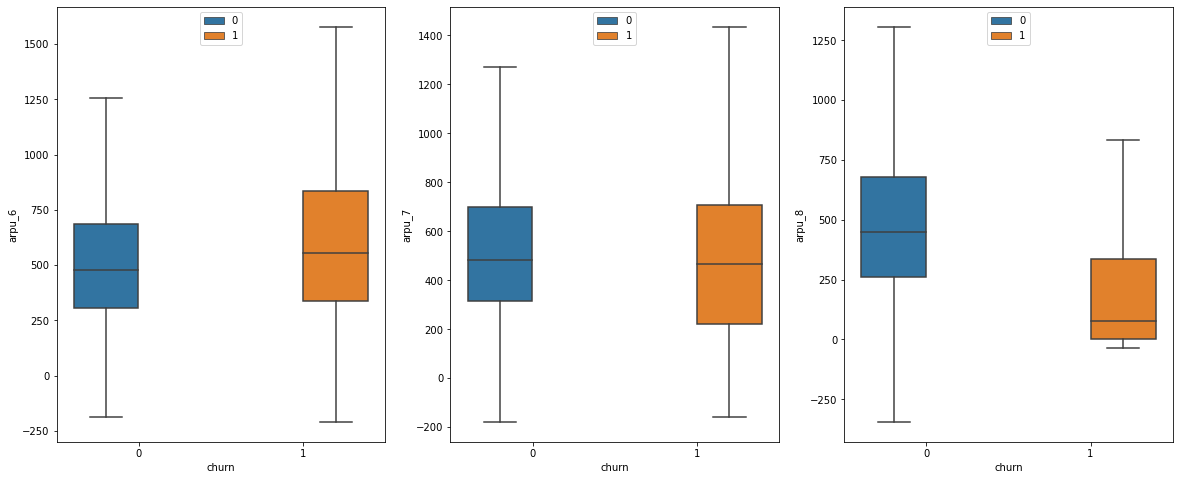

In [58]:
box('arpu_')    # Analyzing ARPU

##### We can observe that -->

1. ARPU for churned customers is somewhat similar to non-churned customers during good phase but it drops significantly in action phase.
2. Although very subtle but the customers from whom ARPU decreases during second month of good phase are more likely to churn.
3. While the customers from whom ARPU does not change much.

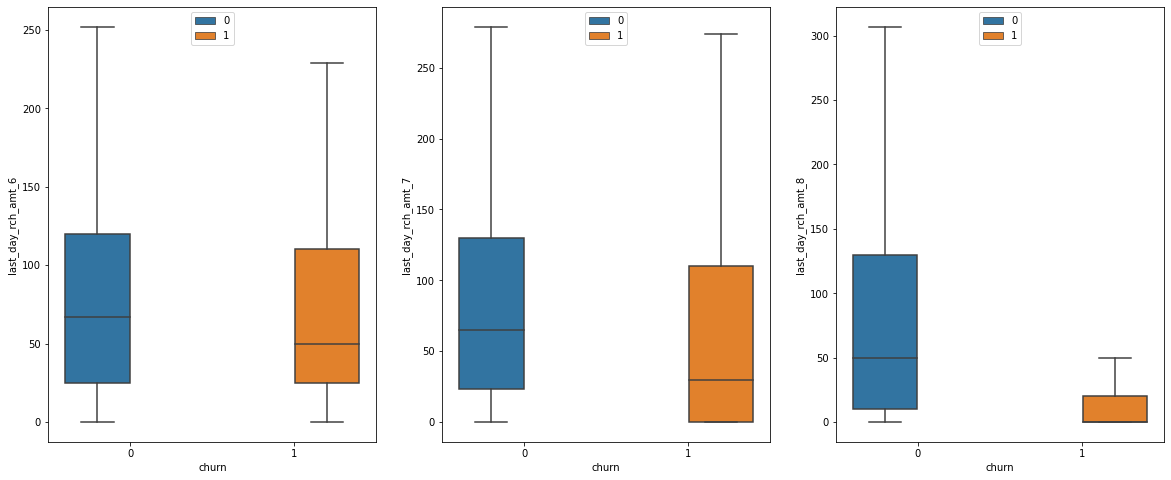

In [59]:
box('last_day_rch_amt_')    # Analyzing last_day_rch_amt

##### It can be noticed that  -->

1. Median for last day recharge amount for non-churned customers is higher than their counterparts, 
2. While the last day recharge amount only drops a little or by insignificant margins for non-churned customers, customers who churned are recharging with very low amount as compared to previous months.

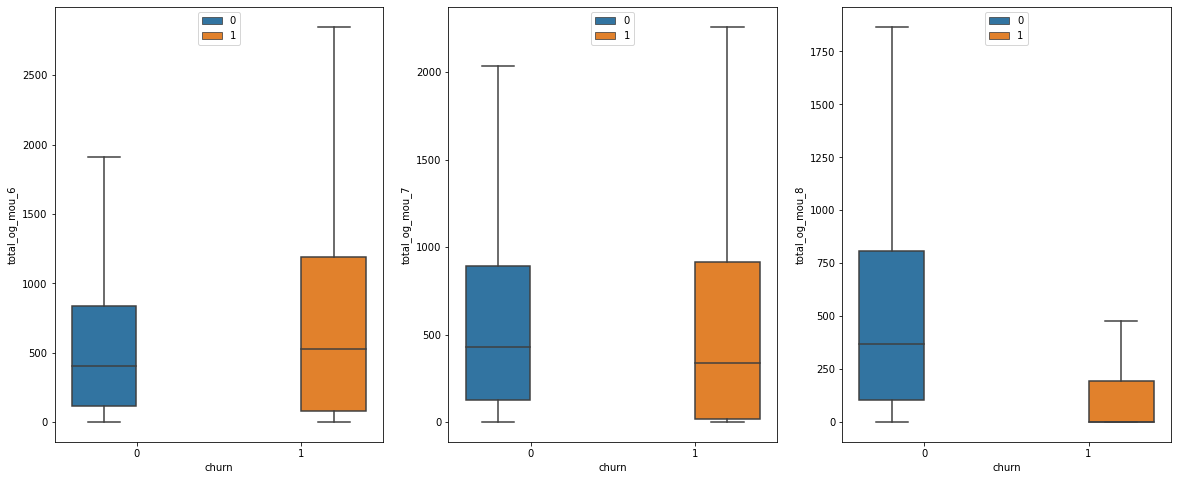

In [60]:
box('total_og_mou_')    # Analyzing total_og_mou_

##### Observation  -->

1. Even though the total outgoing calls for churned customers are more it drops significantly during action phase.
2. Whereas for non-churned customer it remains same mostly

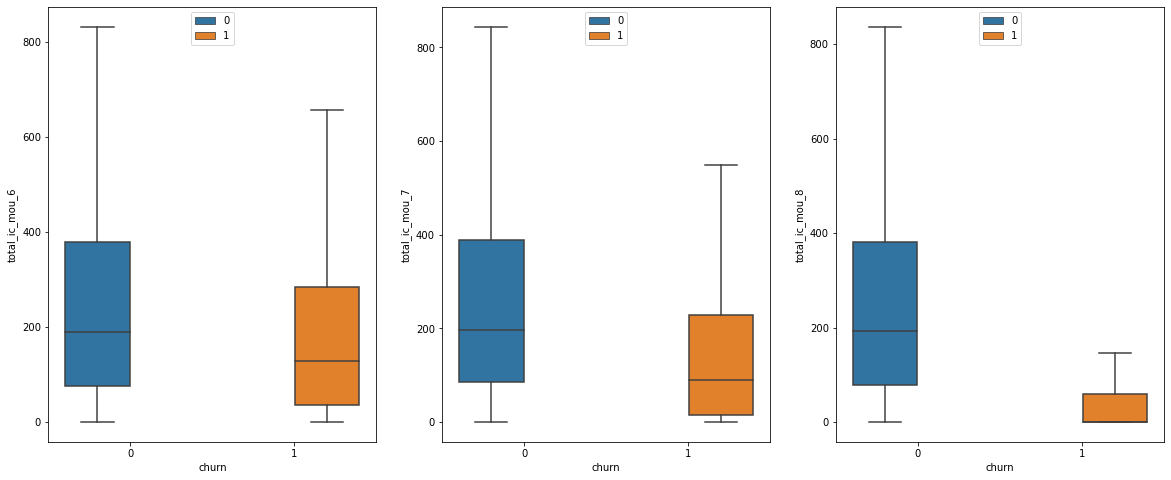

In [61]:
box('total_ic_mou_')    # Analyzing total_ic_mou_8

##### Observation  -->

1. The total incoming calls starts to drops even in the good phase for churned customers while it totally plummets during action phase.
2. The total incoming calls remains more or less the same for non-churned customers during all phases

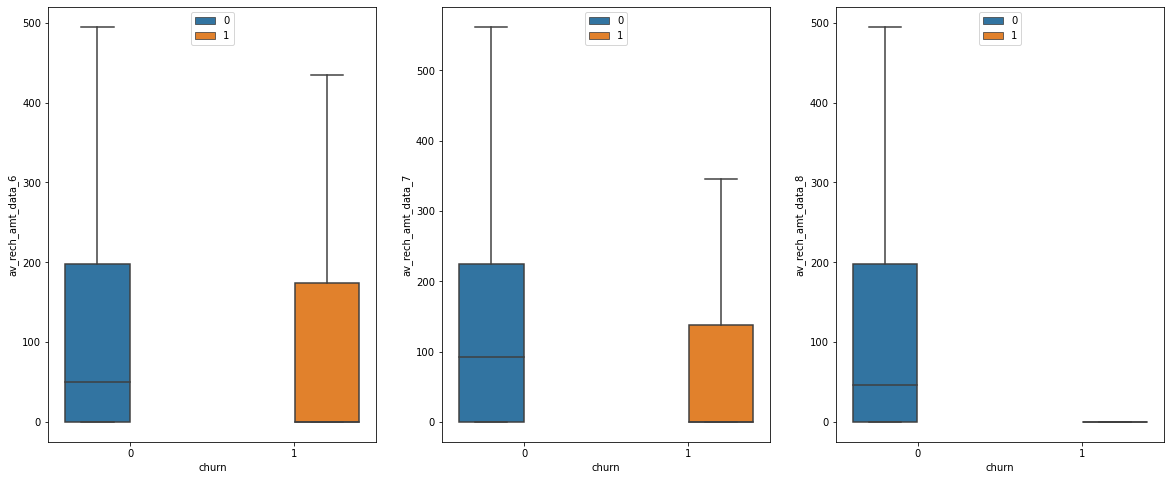

In [62]:
box('av_rech_amt_data_')    # Analyzing av_rech_amt_data

##### Observation  -->

Average recharge amount sees a huge drop in good phase while it diminishes to nearly zero during action phase for churned customers, whereas for not-churned customers the median can be seen changing for the entirety of its duration, yet the overall range remains same.

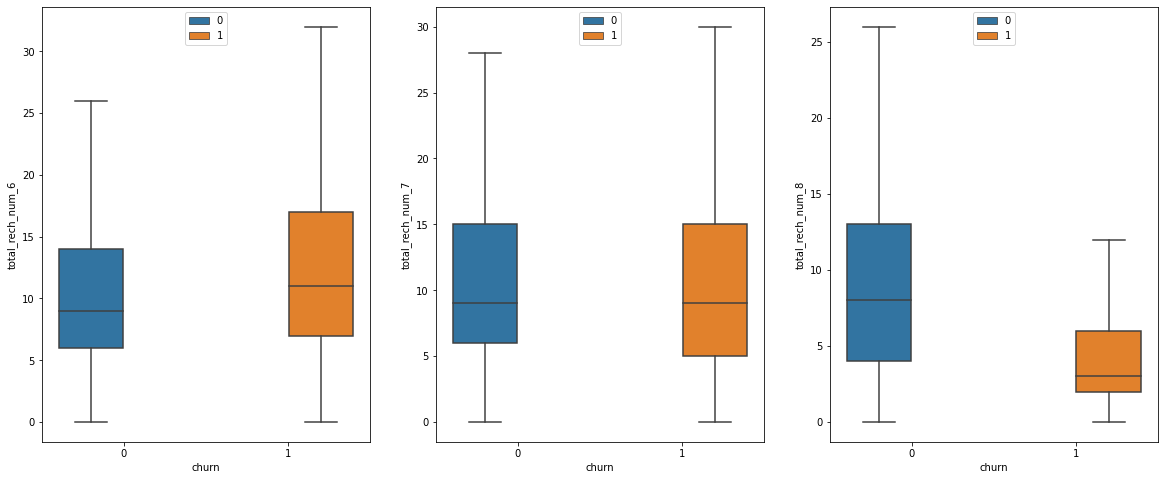

In [63]:
box('total_rech_num_')    # Analyzing total_rech_num

##### Observation  -->

We can see the total number of times recharge done to be reducing for the churned customer as we move from good phase to action phase.

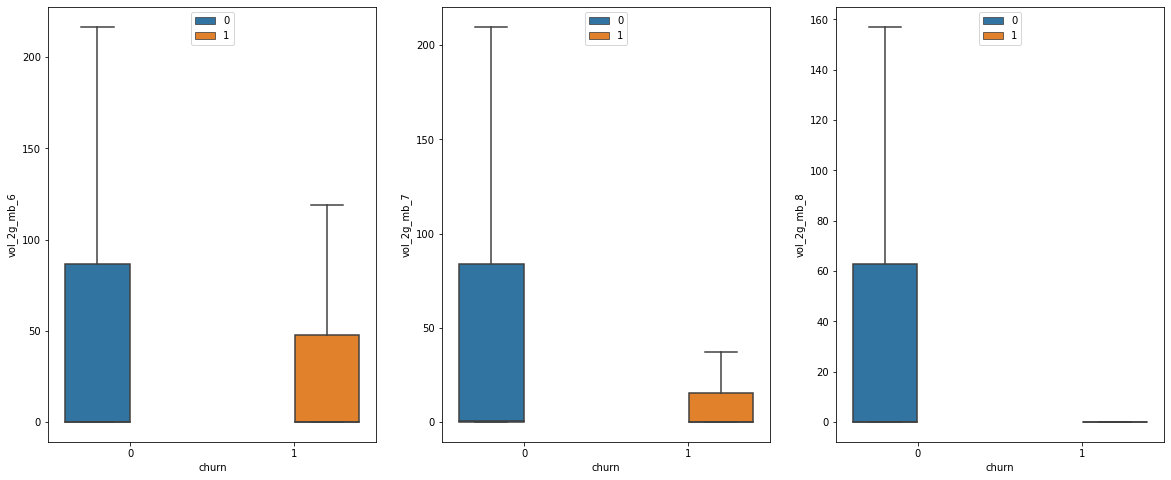

In [64]:
box('vol_2g_mb_')    # Analyzing vol_2g_mb

##### Observation  -->

1. The total amount of 2g data consumption for churned customers is very less than that of non-churned customers in good phase.
2. Also the amount of data consumed reduces for churned customers even in good phase, while it gets near to zero in action phase.

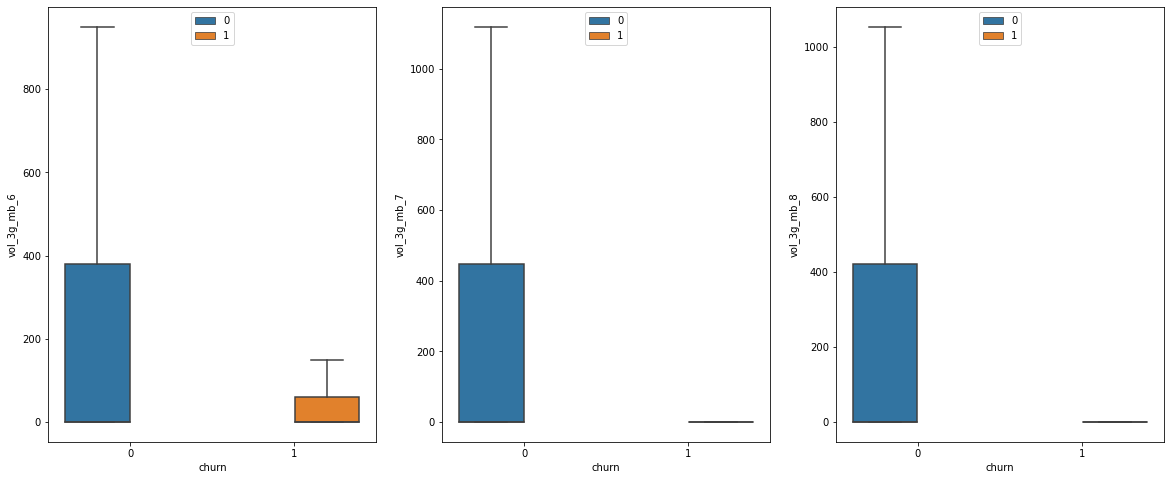

In [65]:
box('vol_3g_mb_')    # Analyzing vol_3g_mb

##### Observation  -->

Interestingly the amount of 3g usage tells a very compelling story as it can be seen that the churned customers were consuming very little data even in first month of good phase, while they nearly stopped consuming in the second month of good-phase itself, while the non-churned customers quite contrary to them shows a subtle growth in 3g data consumption.

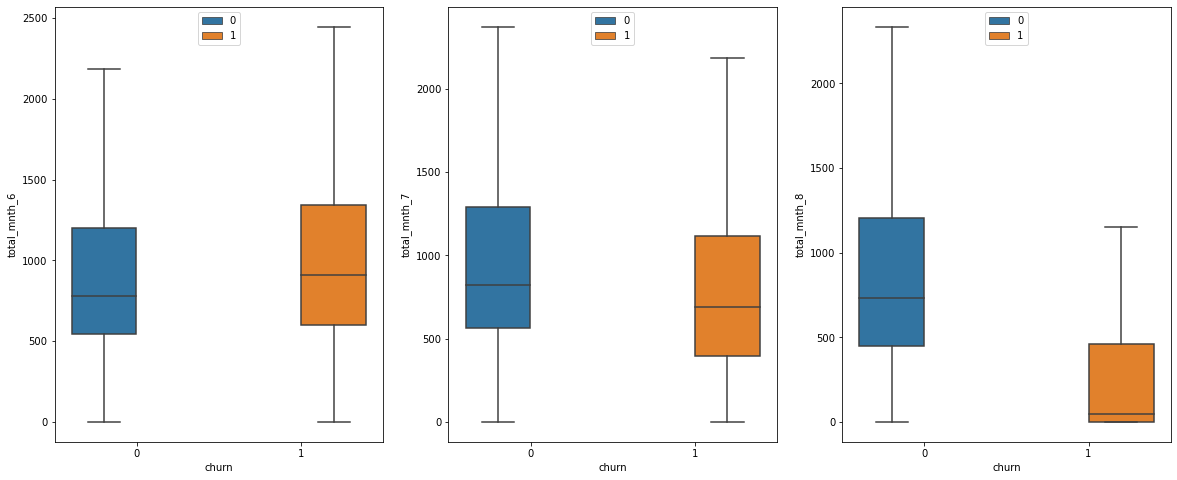

In [66]:
box('total_mnth_')    # Analyzing total_mnth

##### Observation  -->

The total amount of recharge (calls + data), tells the same tale, of significant decrease from good phase to action phase for churned customers, whereas it remains same for non-churned customers.

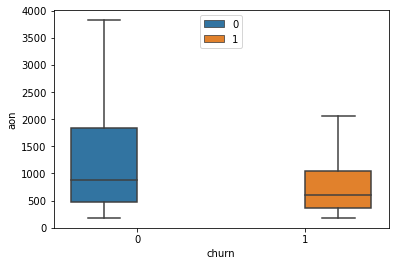

In [67]:
plt.figure(figsize=(6,4))                         # Analyzing aon
                                              
sns.boxplot( y= hvc_df['aon'], x=hvc_df['churn'], hue= hvc_df ['churn'],showfliers=False)

plt.legend(loc=9)

plt.show()

##### Observation  -->

We can notice that customers who have been on network for more time are slightly less likely to churn than their counterparts.

##### Correlation matrix

In [68]:
co_mat = hvc_df[num_col].corr()               # Plotting correlation matrix
co_mat

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_cnt_6,total_data_amt_6,total_mnth_6,total_data_cnt_7,total_data_amt_7,total_mnth_7,total_data_cnt_8,total_data_amt_8,total_mnth_8,good_phase_avg,churn
arpu_6,1.000000,0.671846,0.612987,0.340517,0.216175,0.187744,0.505907,0.340690,0.289408,0.126893,0.083509,0.090328,0.196093,0.143347,0.124921,0.165974,0.127547,0.124137,0.329335,0.245599,0.220753,0.139348,0.114368,0.104217,0.047532,0.010440,0.012606,0.325814,0.246650,0.225921,0.273871,0.161420,0.133717,0.301094,0.181634,0.140382,0.066667,0.053517,0.043861,0.385025,0.230552,0.182646,0.467008,4.208519e-01,0.413600,0.122396,0.068852,0.045219,0.054719,0.024346,0.015483,0.554358,0.363330,0.302143,0.080852,6.277796e-02,0.063436,0.184375,0.149330,0.126508,0.050901,0.039137,0.037473,0.177156,0.142622,0.126816,0.087959,0.061524,0.056856,0.098082,0.065783,0.063256,0.034410,0.032510,0.022898,0.124045,0.085674,0.079794,0.225813,0.168902,0.150710,0.031316,-0.034175,-0.011413,0.103025,0.063114,0.070579,0.016130,0.023872,0.012220,0.349587,0.135940,0.119395,0.946104,0.650738,0.604021,0.337938,0.262047,0.284594,0.266615,0.207485,0.199383,-0.109202,-0.175771,-0.122257,0.072743,-0.021833,0.025218,-0.165722,-0.208768,-0.161987,0.090339,0.020062,0.035046,0.115294,-0.026583,0.029188,-0.062502,-0.098918,-0.077884,0.152422,0.070134,0.084636,0.246331,0.116942,0.137999,0.218435,0.094143,0.118915,-0.038924,-0.083953,-0.061163,-0.158638,-0.194203,-0.152276,0.176303,0.080919,0.103636,-0.002644,-0.025318,-0.017510,0.041525,0.058542,0.055092,0.112315,0.045044,-0.109202,0.088875,0.419394,-0.175771,-0.023925,0.210553,-0.122257,0.003281,0.207504,0.368187,0.067672
arpu_7,0.671846,1.000000,0.759924,0.211366,0.318863,0.267964,0.351774,0.486528,0.391482,0.092420,0.093685,0.093922,0.133450,0.179964,0.152156,0.106174,0.156515,0.133492,0.214822,0.299801,0.251691,0.111969,0.140767,0.121764,0.009023,0.040303,0.032772,0.212756,0.300903,0.251264,

We can see that their are many independent variables which are highly correlated with each other, i.e multicollinearity, with which we will deal in later stages.

##### PAIR Plots

To create pair-plots and heat-maps we will take only top highly correlated variables into consideration, since the number of columns is quite large and therefore to consider all would be computationally exhaustive, so to obtain the so called top variables we will do the following.

In [69]:
co_abs = co_mat.abs()                       # Taking absiolute values of co-relation matrix

up_tri = co_abs.where(np.triu(np.ones(co_abs.shape),k=1).astype(np.bool))      # Storing values of upper triangle in a variable

top_col = [i for i in up_tri.columns if any((up_tri[i] > 0.925) & (up_tri[i] != 1))] # Storing high values from triangle in a list

top_col.append('churn')  # adding target variable to the list

top_col

['isd_og_mou_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'total_mnth_6',
 'total_mnth_7',
 'total_mnth_8',
 'churn']

In [70]:
len(top_col)   # Checking the number of top columns

14

<Figure size 1800x1080 with 0 Axes>

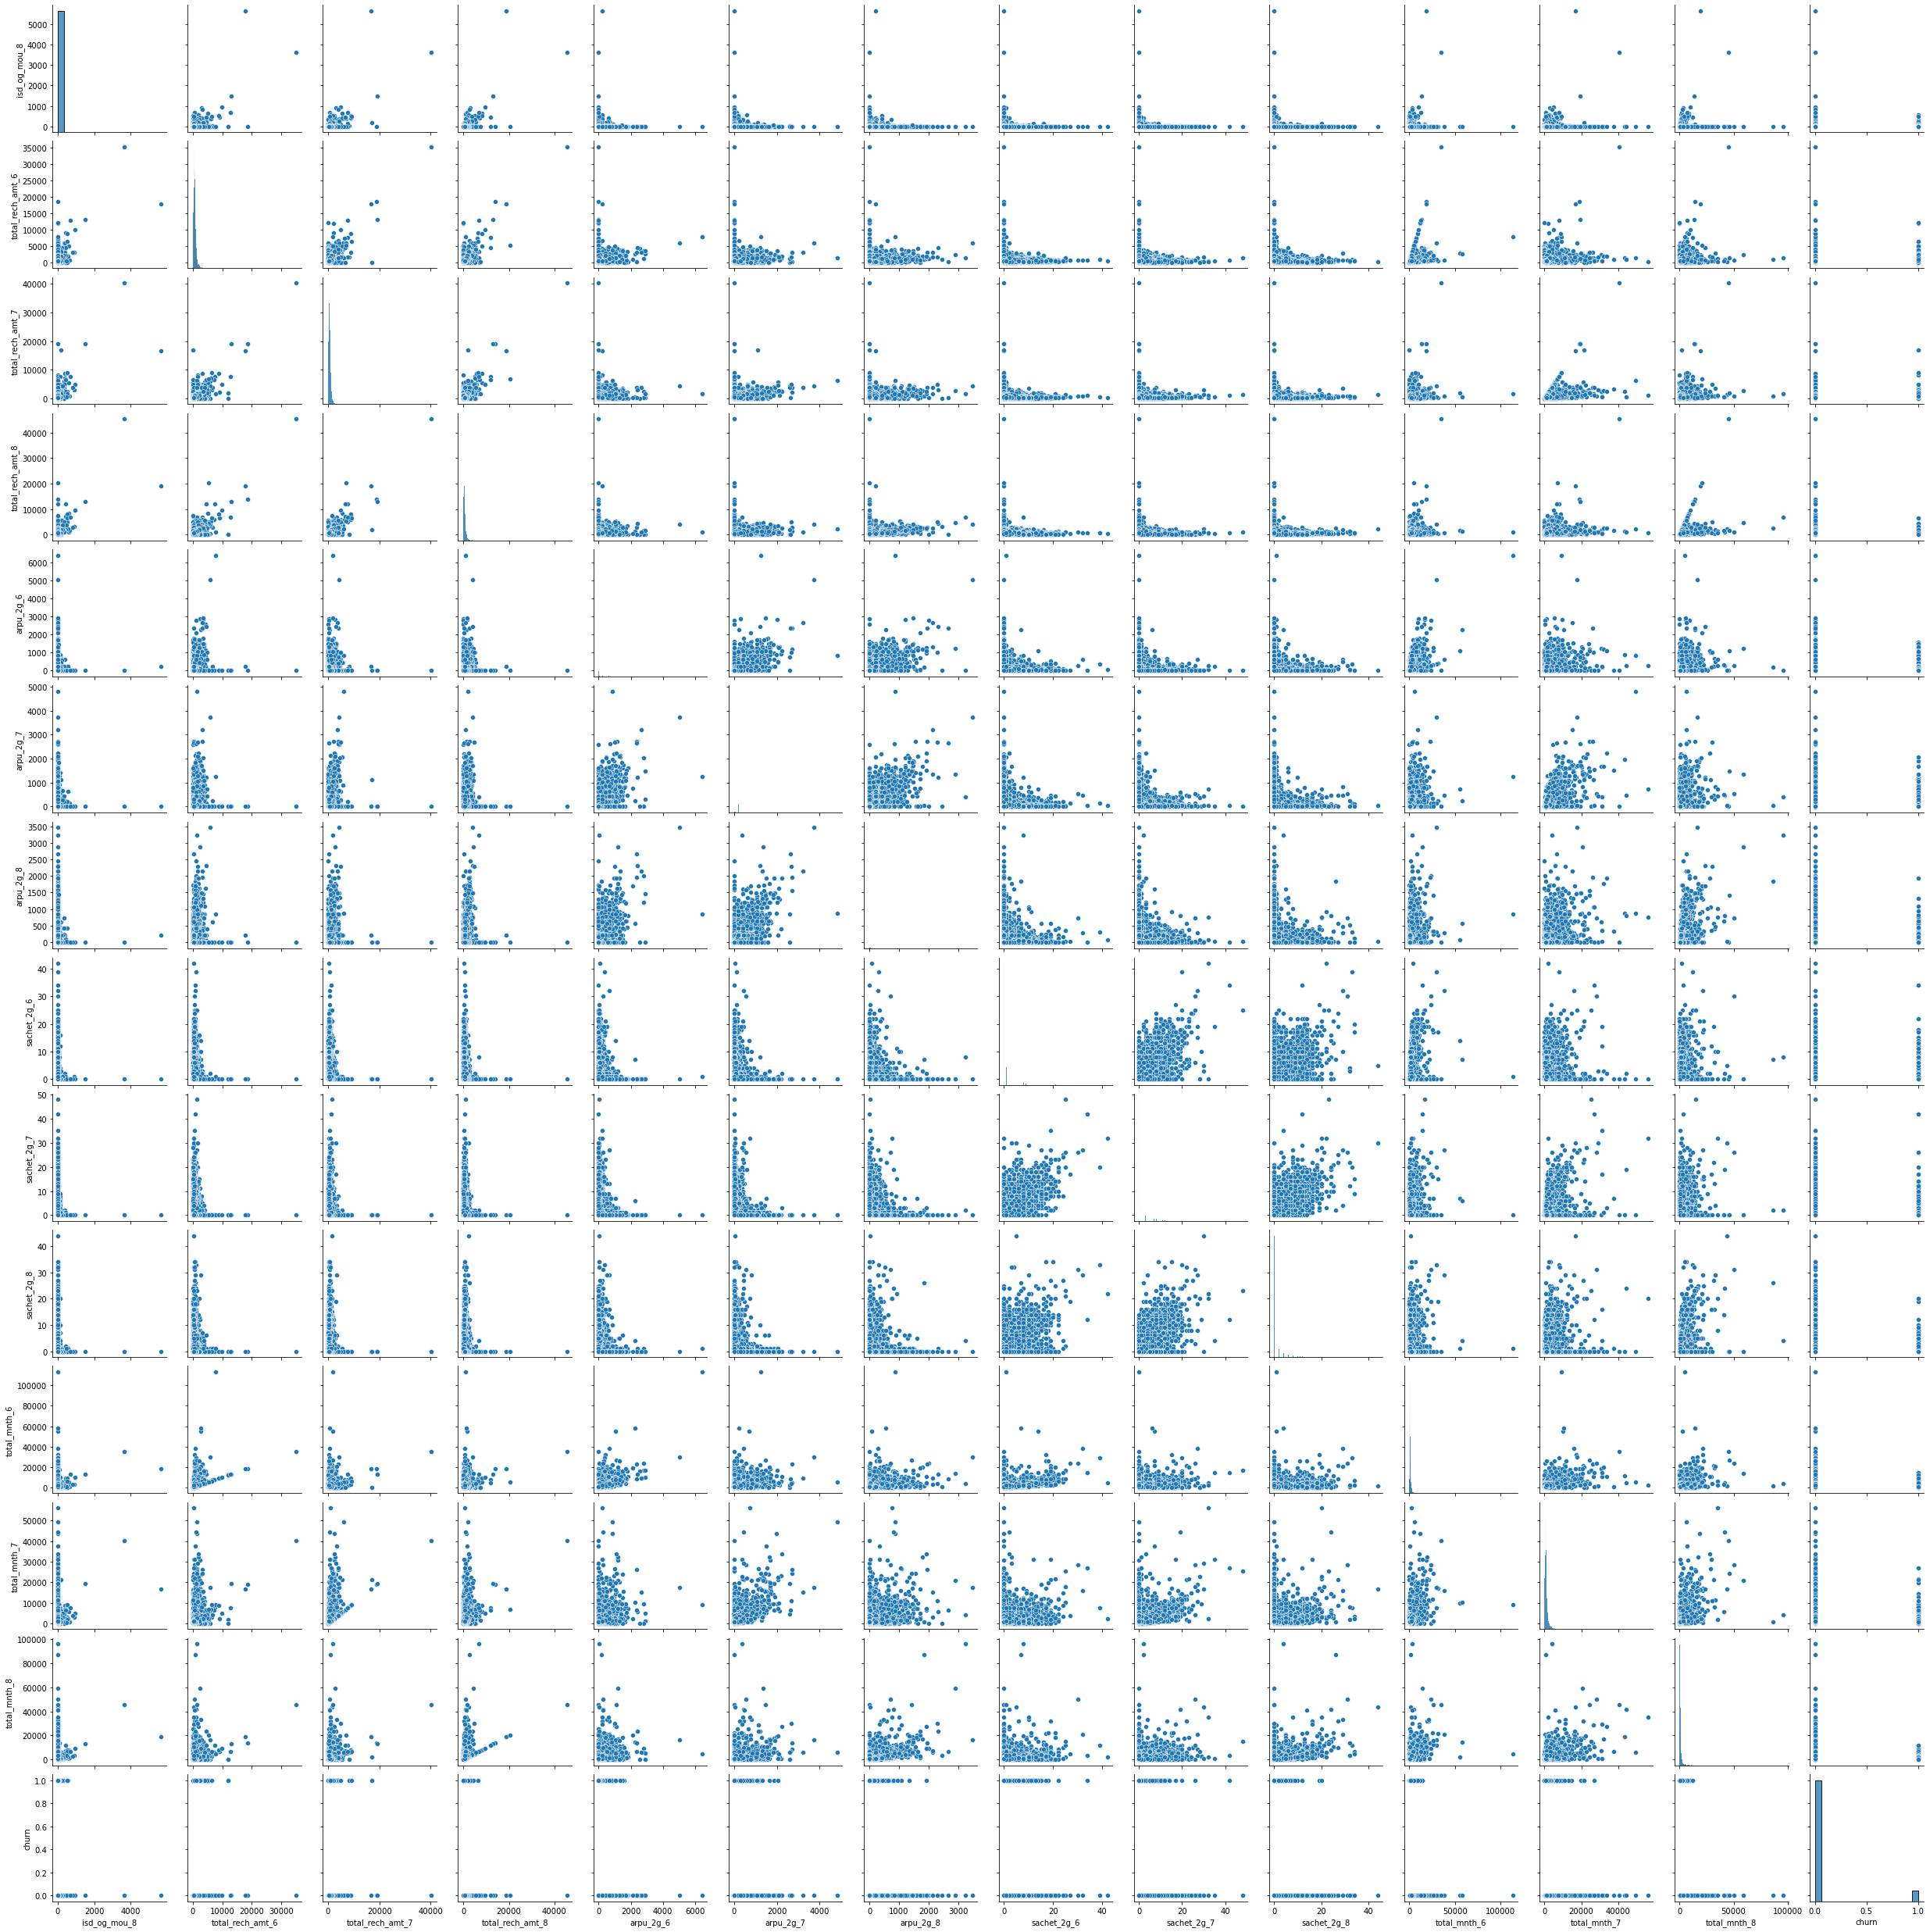

In [71]:
# Plotting the pair plot of top columns 

plt.figure(figsize=(25,15))
sns.pairplot(hvc_df[top_col])
plt.show()

We can notice from the pair-plots that the,

1. total recharge amount done for any month is highly co-related with subsequent months.
2. ARPU generated by any customer in a certain month is highly co-related with the same in any other months.
3. Sachet of 2g data used by a customer is co-related with the total amount of recharge done in the same month.

Now we will plot a co relation matrix between the top columns to confirm the same. 

In [72]:
hvc_df[top_col].corr()

,isd_og_mou_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,total_mnth_6,total_mnth_7,total_mnth_8,churn
isd_og_mou_8,1.000000,0.411491,0.428137,0.465875,0.002965,0.000045,0.002332,-0.012791,-0.014488,-0.012837,0.141352,0.145745,0.152292,-0.004715
total_rech_amt_6,0.411491,1.000000,0.623839,0.609635,0.199826,0.078316,0.106403,-0.160557,-0.194832,-0.153769,0.429384,0.194141,0.203596,0.066852
total_rech_amt_7,0.428137,0.623839,1.000000,0.716176,0.079032,0.213445,0.138593,-0.182837,-0.152511,-0.131618,0.205345,0.433486,0.266275,-0.017079
total_rech_amt_8,0.465875,0.609635,0.716176,1.000000,0.094092,0.125206,0.245486,-0.142782,-0.126866,-0.067514,0.215945,0.280532,0.451630,-0.160967
arpu_2g_6,0.002965,0.199826,0.079032,0.094092,1.000000,0.623423,0.594942,-0.053163,-0.072702,-0.057389,0.559323,0.290834,0.244453,0.000122
arpu_2g_7,0.000045,0.078316,0.213445,0.125206,0.623423,1.000000,0.663814,-0.066325,-0.054824,-0.050456,0.287726,0.554508,0.298728,-0.028821
arpu_2g_8,0.002332,0.106403,0.138593,0.245486,0.594942,0.663814,1.000000,-0.052691,-0.054490,-0.021563,0.286594,0.359853,0.522647,-0.079271
sachet_2g_6,-0.012791,-0.160557,-0.182837,-0.142782,-0.053163,-0.066325,-0.052691,1.000000,0.696155,0.592605,0.381095,0.236204,0.190582,-0.004144
sachet_2g_7,-0.014488,-0.194832,-0.152511,-0.126866,-0.072702,-0.054824,-0.054490,0.696155,1.000000,0.721582,0.205407,0.424512,0.249975,-0.036441
sachet_2g_8,-0.012837,-0.153769,-0.131618,-0.067514,-0.057389,-0.050456,-0.021563,0.592605,0.721582,1.000000,0.196939,0.284617,0.443239,-0.091980


Lets visualize the same matrix using heat-maps

##### Heatmap

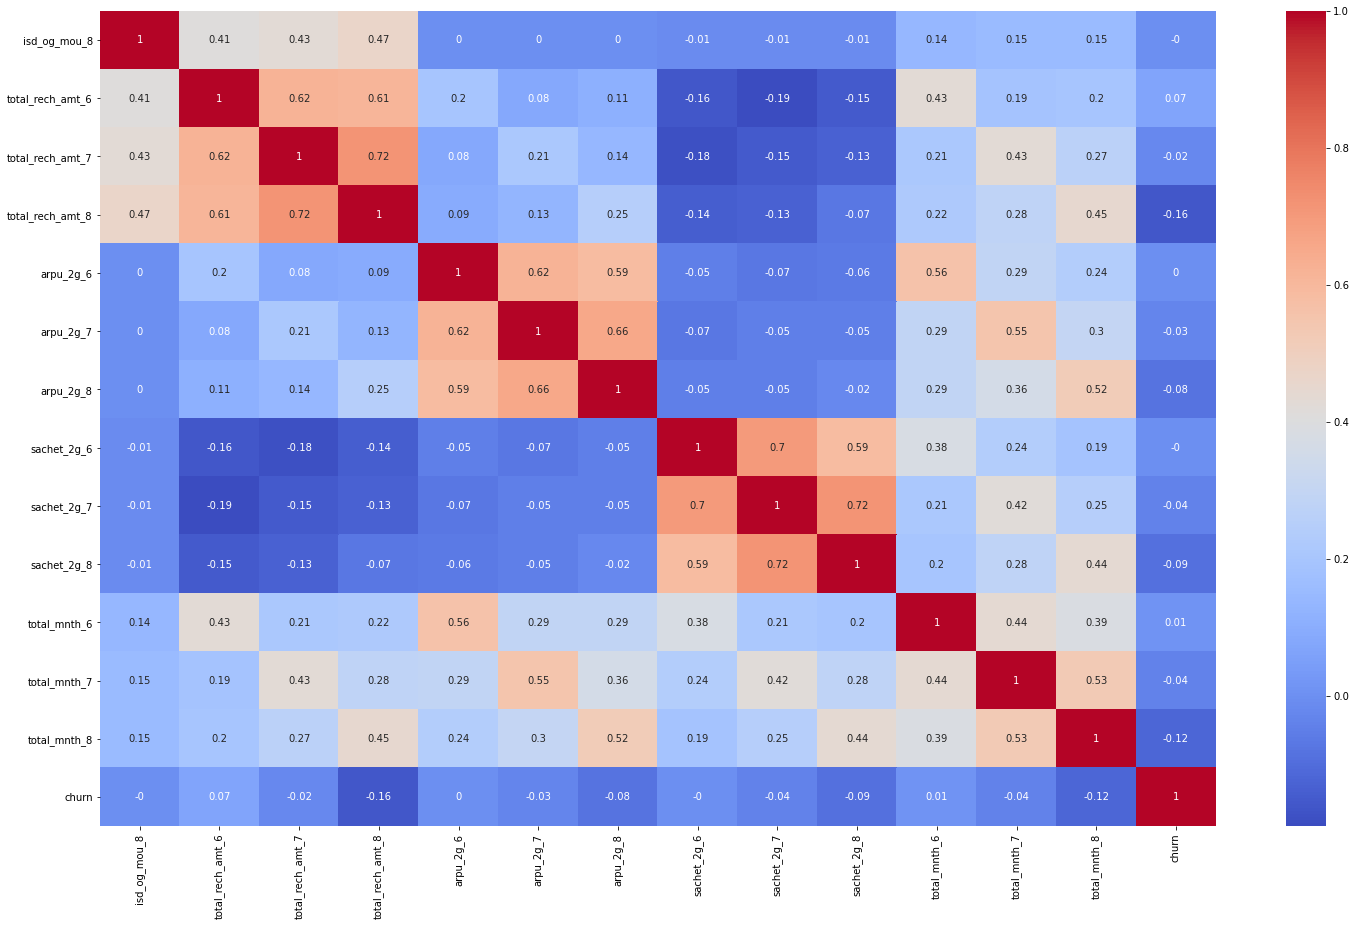

In [73]:
plt.figure(figsize = (25, 15))
sns.heatmap(round(hvc_df[top_col].corr(),2), annot = True, fmt = '.2g', cmap="coolwarm")
plt.show()

Heat-maps confirm the same observations we made while looking at pair-plots

##### CountPlots

Lets plot count-plots for categorical columns

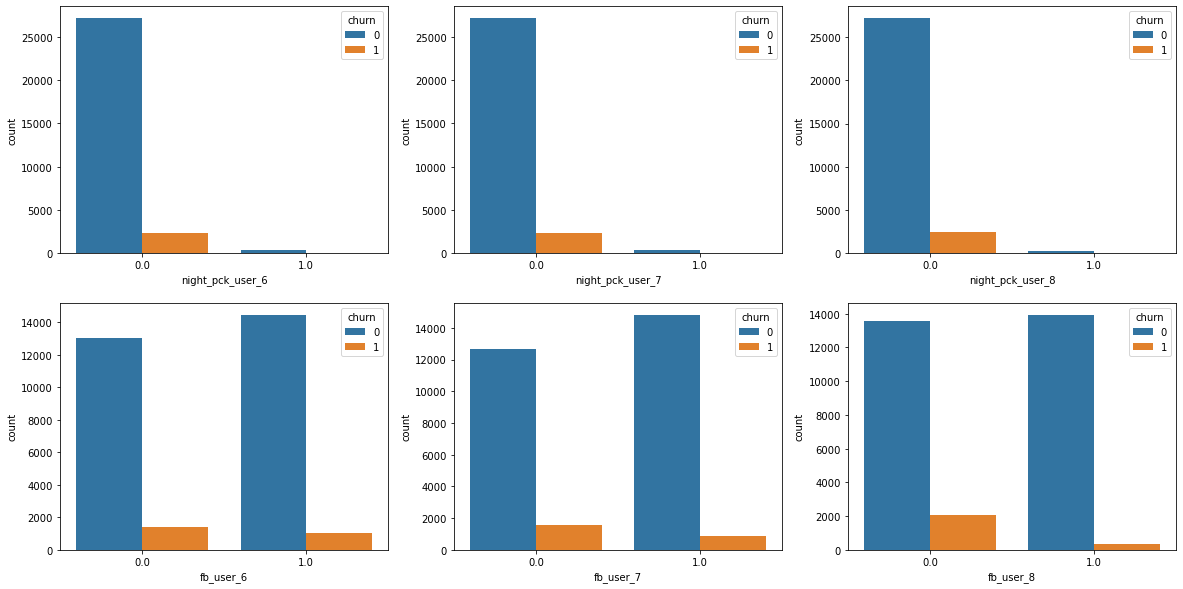

In [74]:
plt.figure(figsize = (20, 10))

for i in range(6):
    
    plt.subplot(2,3,i+1)                                        
    plot = sns.countplot(hvc_df[cat_col[i]], hue = hvc_df['churn'])

plt.show()

###### Observation -->

for both night_user and fb_users we can see that those provided with services are slightly less likely to churn in action phase.

##### Inference from EDA and measures to achieve decline in churn rate

<font color = purple>
    
1. We Noticed that many features like, `total amount of recharge`, `volume of 2g/3g data consumed`, `total incoming/outgoing calls` etc. have decreasing values even in good phase months, with a considerable drop during action phase for churned customer, for these type of features we can try to offer them discounts or vouchers on subsequent recharges, like on one recharge of x amount, we provide y number of coupons which can only be used on distinct recharges, this would act as an incentive to hold them from churning and maybe increase the number and amount of recharges done by one person, thereby increasing the ARPU generated by them.


2. Also for customers who were using less `volume of 2g/3g data`, we saw high churn rate, which could indicate that there are customers with low data requirement, so maybe new plans can be introduced with low data and high validity to carter to the needs of those customers and keeping them from churning, also some entertainment, educational and/or devotional services in terms of promotional coupons or discount on subscription to such 3rd party applications who provide these services can be given to customers so as to drive their data consumption higher.


3. We also noticed that customers with higher age on network were less likely to churn then their counterparts, so longterm plans can be pushed to customers to dwindle their chances of churning, these plans need to be made attractive so that customer are more likely to opt for them rather than other plans, one way of doing that could be to provide lesser per day cost on these plan and or include some discount for various popular OTT applications given the rise in the popularity of same or any similar tactic can be adopted.
</font>

### 4. Data Preparation

#### 4.1 Deriving some more features

We derived some features previously, now we will derive some more features in addition to those

In [75]:
# Deriving new feature total volume of data used

for i in [6,7,8]:
    
    hvc_df[f'total_data_vol_{i}']  = hvc_df[f'vol_2g_mb_{i}'] + hvc_df[f'vol_3g_mb_{i}']
    

    
# Deriving average good phase arpu

hvc_df['arpu_avg_good'] = (hvc_df['arpu_6'] + hvc_df['arpu_7'])/2



# Deriving change in arpu (difference between good phase and action phase)

hvc_df['arpu_diff'] = hvc_df['arpu_avg_good'] - hvc_df['arpu_8']


# Removing date time column before proceeding

hvc_df.drop(dt_col,axis = 1, inplace = True)

In [76]:
hvc_df.head(1)   # Checking head after modifications

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_cnt_6,total_data_amt_6,total_mnth_6,total_data_cnt_7,total_data_amt_7,total_mnth_7,total_data_cnt_8,total_data_amt_8,total_mnth_8,good_phase_avg,churn,total_data_vol_6,total_data_vol_7,total_data_vol_8,arpu_avg_good,arpu_diff
0,197.385,214.816,213.803,88.14,86.89,0.0,229.63,227.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.59,25.79,0.0,80.34,81.74,0.0,0.11,0.21,0.0,0.0,0.0,0.0,129.48,132.89,0.0,3.36,3.3,0.0,18.16,17.78,0.0,0.0,0.0,0.0,50.71,50.06,0.0,0.0,0.0,0.0,0.31,0.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.06,26.68,0.16,86.78,88.41,4.13,2.01,2.16,1.15,138.73,141.86,5.44,0.48,0.55,0.0,5.34,5.54,0.0,0.0,0.0,0.0,11.98,12.74,0.0,0.0,0.0,5.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.4,0.0,101.2,3.58,1,252.0,614.0,1,252.0,504.0,1,252.0,504.0,559.0,1,113.7,152.08,115.36,206.1005,-7.7025


###### Adding the newly derived variables to their respective dtype label

In [77]:
num_col.extend(['total_data_vol_6','total_data_vol_7','total_data_vol_8','arpu_avg_good','arpu_diff'])
num_col.remove('churn')

#### 4.2 Dummy variable creation

In [78]:
hvc_df = pd.get_dummies(hvc_df, drop_first = True)                       # Using inbuilt functions to generate dummy variables
hvc_df.info(verbose = True)                                              # Checking

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 168 columns):
 #   Column                Dtype  
---  ------                -----  
 0   arpu_6                float64
 1   arpu_7                float64
 2   arpu_8                float64
 3   onnet_mou_6           float64
 4   onnet_mou_7           float64
 5   onnet_mou_8           float64
 6   offnet_mou_6          float64
 7   offnet_mou_7          float64
 8   offnet_mou_8          float64
 9   roam_ic_mou_6         float64
 10  roam_ic_mou_7         float64
 11  roam_ic_mou_8         float64
 12  roam_og_mou_6         float64
 13  roam_og_mou_7         float64
 14  roam_og_mou_8         float64
 15  loc_og_t2t_mou_6      float64
 16  loc_og_t2t_mou_7      float64
 17  loc_og_t2t_mou_8      float64
 18  loc_og_t2m_mou_6      float64
 19  loc_og_t2m_mou_7      float64
 20  loc_og_t2m_mou_8      float64
 21  loc_og_t2f_mou_6      float64
 22  loc_og_t2f_mou_7      float64
 23  loc_og_t2f

#### 4.3 Train and Test split

In [79]:
# Performing a train-test split on our dataset with 70% to 30% ratios respectively

from sklearn.model_selection import train_test_split     # Importing the library

df_train, df_test = train_test_split(hvc_df, train_size=0.7, random_state=42)  # Doing the split

In [80]:
df_train.shape  # Checking shape of df_train

(20967, 168)

In [81]:
df_test.shape   # Checking shape of df_test

(8986, 168)

Everything seems to be in order, so let us move forward

#### 4.4 Scaling and taking care of data imbalance

###### Taking care of data imbalance

In [82]:
# Dealing with imbalance in our dataset using Resampling technique

from sklearn.utils import resample  # Importing the relevant library


# Storing both churned and not_churned cases into seprate dataframes

not_churned = df_train[df_train.churn==0]

churned = df_train[df_train.churn==1]


# Upsampling the churned cases

churned_upsampled = resample(churned, replace=True, n_samples=len(not_churned), random_state=42) # Applying the function



# Concatinating 

upsampled = pd.concat([not_churned, churned_upsampled])

In [83]:
# Checking the value count of our upsampled feature

upsampled.churn.value_counts(normalize = True)

1    0.5
0    0.5
Name: churn, dtype: float64

We can see that imbalance has been dealt with successfully

###### X and y splitting for dependent and independent variable

In [84]:
# Splitting into X and y

y_train = upsampled.churn   # Creating y_train

X_train = upsampled.drop('churn', axis=1)  # Creating X_train

y_test = df_test['churn']  # Creating y_test

X_test = df_test.drop('churn',axis = 1)  # Creating X_test

###### Scaling

In [85]:
# Scaling the dataset using standard scaler 

from sklearn.preprocessing import StandardScaler                       # Importing the library

scale = StandardScaler() 

X_train[num_col] = scale.fit_transform(X_train[num_col])                                # Scaling X_train
X_test[num_col] = scale.transform(X_test[num_col])                                      # Scaling X_test

In [86]:
X_train.shape     # Checking X_train shape

(38544, 167)

In [87]:
X_test.shape       # Checking X_test shape 

(8986, 167)

In [88]:
X_train.head()    # Checking X_train head

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_cnt_6,total_data_amt_6,total_mnth_6,total_data_cnt_7,total_data_amt_7,total_mnth_7,total_data_cnt_8,total_data_amt_8,total_mnth_8,good_phase_avg,total_data_vol_6,total_data_vol_7,total_data_vol_8,arpu_avg_good,arpu_diff,night_pck_user_6_1.0,night_pck_user_7_1.0,night_pck_user_8_1.0,fb_user_6_1.0,fb_user_7_1.0,fb_user_8_1.0
49069,-0.940673,-0.763245,-0.605263,-0.578845,-0.546031,-0.468041,-0.658209,-0.660767,-0.618303,-0.200711,-0.184989,-0.186804,-0.246581,-0.245516,-0.207021,-0.348085,-0.326453,-0.300963,-0.523649,-0.516145,-0.465679,-0.279739,-0.26380,-0.218280,2.865231,0.056905,-0.221147,-0.578005,-0.563994,-0.512570,-0.439491,-0.417814,-0.327981,-0.465305,-0.442072,-0.347115,-0.154596,-0.128286,-0.115937,-0.620634,-0.589949,-0.455024,-0.068266,-0.058449,-0.041691,1.273532,2.197111,0.253285,0.017639,-0.019965,-0.012551,-0.795366,-0.722053,-0.579703,-0.336842,-0.353337,-0.308757,-0.571685,-0.536395,-0.351962,-0.254418,-0.280641,-0.281971,-0.607990,-0.600266,-0.453647,-0.185229,-0.172203,-0.138558,-0.314339,-0.257471,-0.234844,-0.119184,-0.107438,-0.110832,-0.334450,-0.298323,-0.266943,-0.666739,-0.628498,-0.414787,-0.341198,1.174676,6.094123,-0.164200,-0.151298,-0.143665,-0.027856,-0.092836,-0.080133,-0.553698,0.544214,0.266947,-0.945573,-0.743720,-0.516179,-0.727502,-0.677586,-0.437841,-0.465123,-0.611970,-0.117553,0.826558,1.778609,0.774655,-0.393967,-0.508796,-0.418999,1.108873,2.263460,1.081859,-0.354404,-0.295842,-0.26496,-0.112578,-0.298192,-0.334137,0.936130,2.632673,2.681304,-0.37063,-0.353052,-0.298810,-0.370885,-0.34342,-0.300245,-0.267981,-0.158766,-0.003011,-0.344116,-0.34146,-0.288589,1.166433,2.320446,1.139135,-0.350825,-0.328726,-0.281511,-0.212069,-0.178146,-0.152652,-0.686961,-0.313476,-0.359845,-0.348595,-0.11402,0.826558,-0.029981,-0.477279,1.778609,-0.036433,-0.337824,0.774655,-0.168931,-0.342316,-0.482270,-0.019104,0.591526,0.5

##### 4.5 PCA

Before we move onto model building it is imperative to do PCA, since our model contains high number of columns and to analyze that many columns could prove to be computational exhaustive, also while performing RFE or any other manual feature selection technique we can even loose on some important information, PCA prevents that from happening and therefore we will apply the same in our dataset.

In [89]:
# Applying PCA

from sklearn.decomposition import PCA    # Importing the relevant libraries

pca = PCA(random_state=42)

pca.fit(X_train)

PCA(random_state=42)

In [90]:
# Transforming using PCA

X_train_pca = pca.fit_transform(X_train)

X_test_pca = pca.transform(X_test)

In [91]:
X_train_pca.shape   # Checking Shape of X_train after PCA

(38544, 167)

In [92]:
X_test_pca.shape    # Checking Shape of X_test after PCA

(8986, 167)

###### Making the scree plot

In [93]:
exp_var = np.cumsum(pca.explained_variance_ratio_) # Storing the explained-variance ratio for each component in a variable

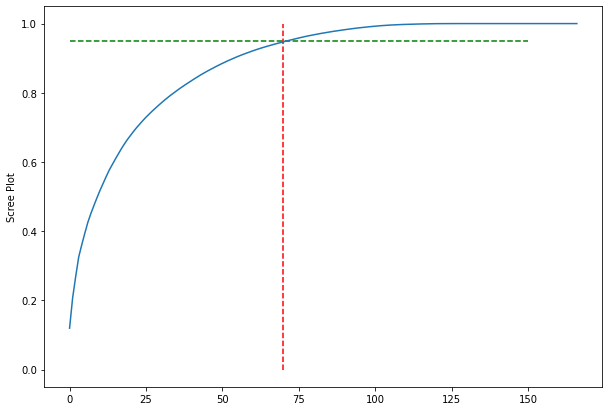

In [94]:
# Making the scree plot

fig = plt.figure(figsize=[10,7])
plt.plot(exp_var)
plt.hlines(y=0.95, xmax=150, xmin=0, colors="g", linestyles="--")
plt.vlines(x=70, ymax=1, ymin=0, colors="r", linestyles="--")
plt.ylabel('Scree Plot')
plt.show()

We can see that around 70 variables are sufficient to explain around 95 percent variance 

###### Performing PCA with 70 components

In [95]:
# Performing Incremental PCA

from sklearn.decomposition import IncrementalPCA

pca_70 = IncrementalPCA(n_components=70)

X_train_pca = pca_70.fit_transform(X_train)

X_train_pca.shape        # Checking Shape of X_train after PCA

(38544, 70)

In [96]:
# Transforming

X_test_pca = pca_70.transform(X_test)

X_test_pca.shape         # Checking Shape of X_test after PCA

(8986, 70)

In [97]:
# Checking features after PCA

col = list((hvc_df.drop('churn',axis = 1)).columns)
hvc_df_pca = pd.DataFrame({'PC1':pca_70.components_[0],'PC2':pca_70.components_[1], 'PC3':pca_70.components_[2],'Feature':col})
hvc_df_pca.head(10)

,PC1,PC2,PC3,Feature
0,-0.010812,0.134785,0.073451,arpu_6
1,0.009116,0.172033,0.104945,arpu_7
2,0.036037,0.182037,0.077239,arpu_8
3,-0.061498,0.075011,0.122569,onnet_mou_6
4,-0.056346,0.092142,0.141767,onnet_mou_7
5,-0.035228,0.105456,0.120530,onnet_mou_8
6,-0.065776,0.102807,0.081548,offnet_mou_6
7,-0.060572,0.127510,0.103112,offnet_mou_7
8,-0.031143,0.138957,0.077393,offnet_mou_8
9,-0.009150,0.015220,-0.001840,roam_ic_mou_6


####  Model Building

### 5. Logistic Regression without PCA

First let us build a simple logistic regression model without PCA, the basic purpose of this model is to provide good interpretability.

###### 1st Model

In [98]:
# Importing relevant libraries

from sklearn.linear_model import LogisticRegression      # Using the class LogisticRegression we will build a function
from sklearn import metrics
from sklearn.feature_selection import RFE


lm = LogisticRegression()

lm.fit(X_train, y_train)                          # applying function on our train and test datasets

rfe = RFE(lm, 15)                                 #  using RFE prioritizing 15 variables, to begin with             
rfe = rfe.fit(X_train, y_train)

In [99]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))   # Creating list with column name and thier RFE ranking

[('arpu_6', False, 103),
 ('arpu_7', False, 52),
 ('arpu_8', False, 24),
 ('onnet_mou_6', False, 11),
 ('onnet_mou_7', False, 134),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 10),
 ('offnet_mou_7', False, 147),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 116),
 ('roam_ic_mou_7', False, 21),
 ('roam_ic_mou_8', False, 123),
 ('roam_og_mou_6', False, 13),
 ('roam_og_mou_7', False, 4),
 ('roam_og_mou_8', False, 2),
 ('loc_og_t2t_mou_6', False, 133),
 ('loc_og_t2t_mou_7', False, 7),
 ('loc_og_t2t_mou_8', False, 8),
 ('loc_og_t2m_mou_6', False, 43),
 ('loc_og_t2m_mou_7', False, 143),
 ('loc_og_t2m_mou_8', False, 53),
 ('loc_og_t2f_mou_6', False, 120),
 ('loc_og_t2f_mou_7', False, 74),
 ('loc_og_t2f_mou_8', False, 152),
 ('loc_og_t2c_mou_6', False, 104),
 ('loc_og_t2c_mou_7', False, 63),
 ('loc_og_t2c_mou_8', False, 62),
 ('loc_og_mou_6', False, 71),
 ('loc_og_mou_7', False, 42),
 ('loc_og_mou_8', False, 64),
 ('std_og_t2t_mou_6', False, 70),
 ('std_og_t2t_mou_7', False, 89

In [100]:
tr_col = X_train.columns[rfe.support_]  # Exctracting top 15 columns upon which our model is to be built
tr_col

Index(['onnet_mou_8', 'offnet_mou_8', 'std_og_mou_7', 'og_others_8',
       'total_og_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2m_mou_7',
       'std_ic_t2m_mou_8', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_8',
       'isd_ic_mou_8', 'sep_vbc_3g', 'fb_user_8_1.0'],
      dtype='object')

In [101]:
X_train_rfe = X_train[tr_col]    # Exctracting the dataset for those 15 columns

In [102]:
import statsmodels.api as sm

X_train_rfe = sm.add_constant(X_train_rfe)  # adding a constant else the intercept will through origin by default

In [103]:
lr1 = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())
res = lr1.fit()                                                              # training the model 
res.summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38544
Model:                            GLM   Df Residuals:                    38528
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16735.
Date:                Wed, 05 Jan 2022   Deviance:                       33471.
Time:                        21:02:47   Pearson chi2:                 5.22e+05
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4011      0.021     19.558      0.000       0.361       0.441
onnet_mou_8          0.8076      0.056     14.302      0.000       0.697       0.918
offnet_mou_8         0.7481      0.056     13.417      0.000       0.639       0.857
std_og_mou_7         0.6525      0.024     27.357      0.000       0.606       0.699
og_others_8         -1.2186      0.448     -2.722      0.006      -2.096      -0.341
total_og_mou_8      -2.0458      0.088    -23.373      0.000      -2.217      -1.874
loc_ic_mou_7         0.7980      0.033     24.064      0.000       0.733       0.863
loc_ic_mou_8         2.9289      0.118     24.790      0.000       2.697       3.161
std_ic_t2m_mou_7    -0.4795      0.049     -9.753      0.000      -0.576      -0.383
std_ic_t2m_mou_8     0.4752      0.058      8.248      0.000       0.362       0.588
std_ic_mou_7         0.6728      0.063     10.676      0.000       0.549       0.796
std_ic_mou_8         1.3628      0.088     15.527      0.000       1.191       1.535
total_ic_mou_8      -5.4837      0.148    -37.140      0.000      -5.773      -5.194
isd_ic_mou_8         1.0106      0.030     33.284      0.000       0.951       1.070
sep_vbc_3g          -0.6969      0.062    -11.327      0.000      -0.818      -0.576
fb_user_8_1.0       -1.3244      0.030    -43.715      0.000      -1.384      -1.265
====================================================================================
"""

All p values are within specified limit

In [104]:
X_2 = X_train_rfe.drop(['const'], axis=1)  # Dropping const because it increases the VIF for all other featuers

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()                                                    # Making a dataframe with name VIF,
X = X_2                                                                 # Storing values of X_2 in X,
vif['Features'] = X.columns                                                    # Storing all names columns of X in a new column,
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]      # Calculating VIF for all columns,
vif['VIF'] = round(vif['VIF'], 2)                                              # Rounding off all VIF values,
vif = vif.sort_values(by = "VIF", ascending = False)                    # Sorting all columns by VIF values in descending order.
vif

,Features,VIF
11,total_ic_mou_8,42.80
6,loc_ic_mou_8,28.78
4,total_og_mou_8,19.59
10,std_ic_mou_8,11.63
1,offnet_mou_8,8.70
0,onnet_mou_8,8.28
8,std_ic_t2m_mou_8,5.28
9,std_ic_mou_7,4.00
7,std_ic_t2m_mou_7,3.78
12,isd_ic_mou_8,2.59


Now we can see that `total_ic_mou_8	` have a very high VIF hence we will drop it and build a 2nd Model 

###### 2nd Model

In [106]:
X_train_rfe.drop('total_ic_mou_8', axis =1, inplace = True)

In [107]:
lr2 = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())
res = lr2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38544
Model:                            GLM   Df Residuals:                    38529
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17508.
Date:                Wed, 05 Jan 2022   Deviance:                       35017.
Time:                        21:02:47   Pearson chi2:                 1.00e+10
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3694      0.020     18.909      0.000       0.331       0.408
onnet_mou_8          2.7758      0.061     45.308      0.000       2.656       2.896
offnet_mou_8         2.7300      0.062     44.188      0.000       2.609       2.851
std_og_mou_7         0.6940      0.024     28.342      0.000       0.646       0.742
og_others_8         -1.7522      0.642     -2.728      0.006      -3.011      -0.493
total_og_mou_8      -5.2382      0.090    -57.960      0.000      -5.415      -5.061
loc_ic_mou_7         0.5691      0.030     18.880      0.000       0.510       0.628
loc_ic_mou_8        -1.1540      0.040    -29.035      0.000      -1.232      -1.076
std_ic_t2m_mou_7    -0.4542      0.048     -9.369      0.000      -0.549      -0.359
std_ic_t2m_mou_8     0.4575      0.059      7.692      0.000       0.341       0.574
std_ic_mou_7         0.6213      0.062     10.002      0.000       0.500       0.743
std_ic_mou_8        -0.7154      0.070    -10.249      0.000      -0.852      -0.579
isd_ic_mou_8        -0.0033      0.013     -0.245      0.806      -0.030       0.023
sep_vbc_3g          -0.8383      0.062    -13.540      0.000      -0.960      -0.717
fb_user_8_1.0       -1.3945      0.030    -46.923      0.000      -1.453      -1.336
====================================================================================
"""

`isd_ic_mou_8` has a high p value so we will deal with it later

In [108]:
X_2 = X_train_rfe.drop(['const'], axis=1)  # Dropping const because it increases the VIF for all other featuers

In [109]:
vif = pd.DataFrame()                                                    # Making a dataframe with name VIF,
X = X_2                                                                 # Storing values of X_2 in X,
vif['Features'] = X.columns                                                    # Storing all names columns of X in a new column,
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]      # Calculating VIF for all columns,
vif['VIF'] = round(vif['VIF'], 2)                                              # Rounding off all VIF values,
vif = vif.sort_values(by = "VIF", ascending = False)                    # Sorting all columns by VIF values in descending order.
vif

,Features,VIF
4,total_og_mou_8,14.62
1,offnet_mou_8,6.90
0,onnet_mou_8,6.71
10,std_ic_mou_8,5.57
8,std_ic_t2m_mou_8,5.28
9,std_ic_mou_7,4.00
7,std_ic_t2m_mou_7,3.78
6,loc_ic_mou_8,2.56
5,loc_ic_mou_7,2.35
2,std_og_mou_7,1.61


`total_og_mou_8` has a high VIF value so we will deal with it later

###### 3rd Model

In [110]:
X_train_rfe.drop('isd_ic_mou_8', axis =1, inplace = True)

In [111]:
lr3 = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())
res = lr3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38544
Model:                            GLM   Df Residuals:                    38530
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17508.
Date:                Wed, 05 Jan 2022   Deviance:                       35017.
Time:                        21:02:48   Pearson chi2:                 1.01e+10
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3694      0.020     18.911      0.000       0.331       0.408
onnet_mou_8          2.7767      0.061     45.396      0.000       2.657       2.897
offnet_mou_8         2.7307      0.062     44.255      0.000       2.610       2.852
std_og_mou_7         0.6942      0.024     28.362      0.000       0.646       0.742
og_others_8         -1.7516      0.642     -2.727      0.006      -3.010      -0.493
total_og_mou_8      -5.2396      0.090    -58.086      0.000      -5.416      -5.063
loc_ic_mou_7         0.5690      0.030     18.879      0.000       0.510       0.628
loc_ic_mou_8        -1.1542      0.040    -29.042      0.000      -1.232      -1.076
std_ic_t2m_mou_7    -0.4539      0.048     -9.368      0.000      -0.549      -0.359
std_ic_t2m_mou_8     0.4574      0.059      7.689      0.000       0.341       0.574
std_ic_mou_7         0.6207      0.062     10.002      0.000       0.499       0.742
std_ic_mou_8        -0.7155      0.070    -10.250      0.000      -0.852      -0.579
sep_vbc_3g          -0.8383      0.062    -13.541      0.000      -0.960      -0.717
fb_user_8_1.0       -1.3946      0.030    -46.929      0.000      -1.453      -1.336
====================================================================================
"""

All p values are under specified limit

In [112]:
X_2 = X_train_rfe.drop(['const'], axis=1)  # Dropping const because it increases the VIF for all other featuers

In [113]:
vif = pd.DataFrame()                                                    # Making a dataframe with name VIF,
X = X_2                                                                 # Storing values of X_2 in X,
vif['Features'] = X.columns                                                    # Storing all names columns of X in a new column,
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]      # Calculating VIF for all columns,
vif['VIF'] = round(vif['VIF'], 2)                                              # Rounding off all VIF values,
vif = vif.sort_values(by = "VIF", ascending = False)                    # Sorting all columns by VIF values in descending order.
vif

,Features,VIF
4,total_og_mou_8,14.58
1,offnet_mou_8,6.89
0,onnet_mou_8,6.70
10,std_ic_mou_8,5.56
8,std_ic_t2m_mou_8,5.28
9,std_ic_mou_7,4.00
7,std_ic_t2m_mou_7,3.78
6,loc_ic_mou_8,2.56
5,loc_ic_mou_7,2.35
2,std_og_mou_7,1.61


Now we can see that `total_og_mou_8	` have high VIF hence we will drop it and build a 4th Model 

###### 4th Model

In [114]:
X_train_rfe.drop('total_og_mou_8', axis =1, inplace = True)

In [115]:
lr4 = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())
res = lr4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38544
Model:                            GLM   Df Residuals:                    38531
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20110.
Date:                Wed, 05 Jan 2022   Deviance:                       40220.
Time:                        21:02:48   Pearson chi2:                 1.71e+05
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3476      0.018     19.406      0.000       0.312       0.383
onnet_mou_8         -0.4886      0.018    -27.050      0.000      -0.524      -0.453
offnet_mou_8        -0.4820      0.019    -25.931      0.000      -0.518      -0.446
std_og_mou_7         0.3669      0.020     18.443      0.000       0.328       0.406
og_others_8         -2.0466      0.585     -3.500      0.000      -3.193      -0.901
loc_ic_mou_7         0.2799      0.025     11.203      0.000       0.231       0.329
loc_ic_mou_8        -1.0771      0.033    -32.611      0.000      -1.142      -1.012
std_ic_t2m_mou_7    -0.4554      0.048     -9.417      0.000      -0.550      -0.361
std_ic_t2m_mou_8     0.3732      0.060      6.182      0.000       0.255       0.491
std_ic_mou_7         0.7537      0.060     12.664      0.000       0.637       0.870
std_ic_mou_8        -0.8633      0.067    -12.834      0.000      -0.995      -0.731
sep_vbc_3g          -0.9174      0.069    -13.224      0.000      -1.053      -0.781
fb_user_8_1.0       -1.7085      0.028    -61.511      0.000      -1.763      -1.654
====================================================================================
"""

All p values are under specified limit

In [116]:
X_2 = X_train_rfe.drop(['const'], axis=1)  # Dropping const because it increases the VIF for all other featuers

In [117]:
vif = pd.DataFrame()                                                    # Making a dataframe with name VIF,
X = X_2                                                                 # Storing values of X_2 in X,
vif['Features'] = X.columns                                                    # Storing all names columns of X in a new column,
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]      # Calculating VIF for all columns,
vif['VIF'] = round(vif['VIF'], 2)                                              # Rounding off all VIF values,
vif = vif.sort_values(by = "VIF", ascending = False)                    # Sorting all columns by VIF values in descending order.
vif

,Features,VIF
9,std_ic_mou_8,5.56
7,std_ic_t2m_mou_8,5.27
8,std_ic_mou_7,4.00
6,std_ic_t2m_mou_7,3.78
5,loc_ic_mou_8,2.54
4,loc_ic_mou_7,2.35
2,std_og_mou_7,1.58
0,onnet_mou_8,1.29
1,offnet_mou_8,1.29
11,fb_user_8_1.0,1.06


Now we can see that `std_ic_mou_8	` have high VIF hence we will drop it and build a 5th Model 

###### 5th Model

In [118]:
X_train_rfe.drop('std_ic_mou_8', axis =1, inplace = True)

In [119]:
lr5 = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())
res = lr5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38544
Model:                            GLM   Df Residuals:                    38532
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20231.
Date:                Wed, 05 Jan 2022   Deviance:                       40461.
Time:                        21:02:49   Pearson chi2:                 1.75e+05
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3442      0.018     19.312      0.000       0.309       0.379
onnet_mou_8         -0.5210      0.018    -28.880      0.000      -0.556      -0.486
offnet_mou_8        -0.4931      0.019    -26.495      0.000      -0.530      -0.457
std_og_mou_7         0.3890      0.020     19.567      0.000       0.350       0.428
og_others_8         -2.0265      0.577     -3.514      0.000      -3.157      -0.896
loc_ic_mou_7         0.2972      0.025     11.836      0.000       0.248       0.346
loc_ic_mou_8        -1.1064      0.033    -33.230      0.000      -1.172      -1.041
std_ic_t2m_mou_7    -0.0159      0.030     -0.534      0.593      -0.074       0.042
std_ic_t2m_mou_8    -0.2899      0.029     -9.840      0.000      -0.348      -0.232
std_ic_mou_7         0.1399      0.028      5.050      0.000       0.086       0.194
sep_vbc_3g          -0.9218      0.070    -13.245      0.000      -1.058      -0.785
fb_user_8_1.0       -1.7041      0.028    -61.592      0.000      -1.758      -1.650
====================================================================================
"""

`std_ic_t2m_mou_7` has a very high p value and therefore needs to be dropped

In [120]:
X_2 = X_train_rfe.drop(['const'], axis=1)  # Dropping const because it increases the VIF for all other featuers

In [121]:
vif = pd.DataFrame()                                                    # Making a dataframe with name VIF,
X = X_2                                                                 # Storing values of X_2 in X,
vif['Features'] = X.columns                                                    # Storing all names columns of X in a new column,
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]      # Calculating VIF for all columns,
vif['VIF'] = round(vif['VIF'], 2)                                              # Rounding off all VIF values,
vif = vif.sort_values(by = "VIF", ascending = False)                    # Sorting all columns by VIF values in descending order.
vif

,Features,VIF
6,std_ic_t2m_mou_7,3.10
8,std_ic_mou_7,2.71
5,loc_ic_mou_8,2.54
4,loc_ic_mou_7,2.35
7,std_ic_t2m_mou_8,1.62
2,std_og_mou_7,1.57
1,offnet_mou_8,1.29
0,onnet_mou_8,1.28
10,fb_user_8_1.0,1.06
9,sep_vbc_3g,1.01


All VIF values are within acceptable range

###### 6th Model

In [122]:
X_train_rfe.drop('std_ic_t2m_mou_7', axis =1, inplace = True)

In [123]:
lr6 = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())
res = lr6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38544
Model:                            GLM   Df Residuals:                    38533
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20231.
Date:                Wed, 05 Jan 2022   Deviance:                       40462.
Time:                        21:02:49   Pearson chi2:                 1.76e+05
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3441      0.018     19.304      0.000       0.309       0.379
onnet_mou_8         -0.5201      0.018    -28.965      0.000      -0.555      -0.485
offnet_mou_8        -0.4928      0.019    -26.496      0.000      -0.529      -0.456
std_og_mou_7         0.3886      0.020     19.559      0.000       0.350       0.428
og_others_8         -2.0259      0.577     -3.511      0.000      -3.157      -0.895
loc_ic_mou_7         0.2965      0.025     11.822      0.000       0.247       0.346
loc_ic_mou_8        -1.1055      0.033    -33.241      0.000      -1.171      -1.040
std_ic_t2m_mou_8    -0.2962      0.027    -10.913      0.000      -0.349      -0.243
std_ic_mou_7         0.1301      0.021      6.322      0.000       0.090       0.170
sep_vbc_3g          -0.9217      0.070    -13.244      0.000      -1.058      -0.785
fb_user_8_1.0       -1.7035      0.028    -61.621      0.000      -1.758      -1.649
====================================================================================
"""

All p values are within specified limit

In [124]:
X_2 = X_train_rfe.drop(['const'], axis=1)  # Dropping const because it increases the VIF for all other featuers

In [125]:
vif = pd.DataFrame()                                                    # Making a dataframe with name VIF,
X = X_2                                                                 # Storing values of X_2 in X,
vif['Features'] = X.columns                                                    # Storing all names columns of X in a new column,
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]      # Calculating VIF for all columns,
vif['VIF'] = round(vif['VIF'], 2)                                              # Rounding off all VIF values,
vif = vif.sort_values(by = "VIF", ascending = False)                    # Sorting all columns by VIF values in descending order.
vif

,Features,VIF
5,loc_ic_mou_8,2.54
4,loc_ic_mou_7,2.34
2,std_og_mou_7,1.57
6,std_ic_t2m_mou_8,1.40
7,std_ic_mou_7,1.39
1,offnet_mou_8,1.29
0,onnet_mou_8,1.27
9,fb_user_8_1.0,1.06
8,sep_vbc_3g,1.01
3,og_others_8,1.00


All VIF values are within acceptable range

######  Making Predictions

In [126]:
y_train_pred = (res.predict(X_train_rfe)).values.reshape(-1)    # Making predictions on training dataset and reshaping it
y_train_pred

array([0.36452964, 0.08803339, 0.0664269 , ..., 0.65022916, 0.60603822,
       0.71923526])

In [127]:
y_train_final_pred = pd.DataFrame({'churn':y_train.values, 'probability_to_churn':y_train_pred})
y_train_final_pred['ID'] = y_train.index
y_train_final_pred.head()

,churn,probability_to_churn,ID
0,0,0.364530,49069
1,0,0.088033,90375
2,0,0.066427,80131
3,0,0.194195,22699
4,0,0.630301,64492


In [128]:
# setting the cutoff limit to 0.5 

y_train_final_pred['Predicted'] = y_train_final_pred.probability_to_churn.map(lambda x: 1 if x > 0.5 else 0)


In [129]:
y_train_final_pred.head()   # Checking

,churn,probability_to_churn,ID,Predicted
0,0,0.364530,49069,0
1,0,0.088033,90375,0
2,0,0.066427,80131,0
3,0,0.194195,22699,0
4,0,0.630301,64492,1


#####   Preliminary train model

In [130]:
from sklearn import metrics

# Confusion matrix 
c_matrix = metrics.confusion_matrix(y_train_final_pred.churn, y_train_final_pred.Predicted )
print(c_matrix)

[[14047  5225]
 [ 3895 15377]]


In [131]:
# Predicted     not_churned    churned
# Actual
# not_converted        14047        5225
# converted            3895        15377  

In [132]:
# Overall accuracy of model

print(metrics.accuracy_score(y_train_final_pred.churn, y_train_final_pred.Predicted))


0.763387297633873


In [133]:
# Elements of Confusion matrix

TP = c_matrix[1,1] # true positive 
TN = c_matrix[0,0] # true negatives
FP = c_matrix[0,1] # false positives
FN = c_matrix[1,0] # false negatives

In [134]:
TP / float(TP+FN)      # Sensitivity

0.7978933167289332

######  Making ROC

In [135]:
# Making custom function to plot ROC Curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [136]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_final_pred.churn, y_train_final_pred.probability_to_churn, 
                                         drop_intermediate = False )

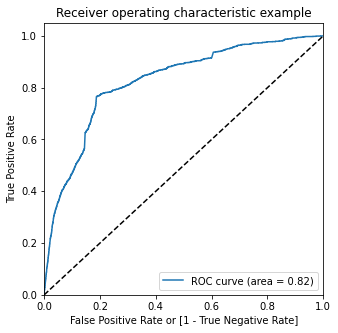

In [137]:
# ROC

draw_roc(y_train_final_pred.churn, y_train_final_pred.probability_to_churn)

Our ROC curve covers 0.82 times area, which is a very good score since the closest the score is to 1, better is our predective model 

###### Finding Optimal Cutoff

In [138]:
# Different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_final_pred[i]= y_train_final_pred.probability_to_churn.map(lambda x: 1 if x > i else 0)
y_train_final_pred.head()

,churn,probability_to_churn,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.364530,49069,0,1,1,1,1,0,0,0,0,0,0
1,0,0.088033,90375,0,1,0,0,0,0,0,0,0,0,0
2,0,0.066427,80131,0,1,0,0,0,0,0,0,0,0,0
3,0,0.194195,22699,0,1,1,0,0,0,0,0,0,0,0
4,0,0.630301,64492,1,1,1,1,1,1,1,1,0,0,0


In [139]:
# Calculating accuracy, sensitivity and specificity.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_final_pred.churn, y_train_final_pred[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.581543  0.977532  0.185554
0.2   0.2  0.638673  0.957814  0.319531
0.3   0.3  0.683686  0.901048  0.466324
0.4   0.4  0.736639  0.852844  0.620434
0.5   0.5  0.763387  0.797893  0.728881
0.6   0.6  0.788372  0.768005  0.808738
0.7   0.7  0.686358  0.476391  0.896326
0.8   0.8  0.624377  0.280407  0.968348
0.9   0.9  0.519303  0.042082  0.996523


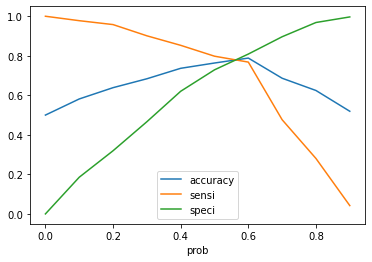

In [140]:
# Accuracy, sensitivity and specificity trade-off.


cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


###### From the curve above, 0.59 is the optimum point to take as cutoff probability, but for better sensitivity we will go with `0.45`

Since more sensitivity is our goal we can go for 0.45 as a better cutoff

In [141]:
y_train_final_pred['final_Predicted'] =  y_train_final_pred.probability_to_churn.map( lambda x: 1 if x > 0.45 else 0)

y_train_final_pred.head()

,churn,probability_to_churn,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.364530,49069,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.088033,90375,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.066427,80131,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.194195,22699,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.630301,64492,1,1,1,1,1,1,1,1,0,0,0,1


###### Metrics of final train model

In [142]:
metrics.accuracy_score(y_train_final_pred.churn, y_train_final_pred.final_Predicted)   # ACCURACY

0.7532689912826899

In [143]:
c_matrix = metrics.confusion_matrix(y_train_final_pred.churn, y_train_final_pred.final_Predicted )
c_matrix                # Confusion Matrix

array([[13337,  5935],
       [ 3575, 15697]], dtype=int64)

In [144]:
# Elements of confusion matrix

TP = c_matrix[1,1] # true positive 
TN = c_matrix[0,0] # true negatives
FP = c_matrix[0,1] # false positives
FN = c_matrix[1,0] # false negatives

In [145]:
# Sensitivity

TP / float(TP+FN)

0.8144977168949772

###### Metrics of test model

In [146]:
# Scaling Test data set

X_test[num_col] = scale.transform(X_test[num_col])

X_test.head(3)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_cnt_6,total_data_amt_6,total_mnth_6,total_data_cnt_7,total_data_amt_7,total_mnth_7,total_data_cnt_8,total_data_amt_8,total_mnth_8,good_phase_avg,total_data_vol_6,total_data_vol_7,total_data_vol_8,arpu_avg_good,arpu_diff,night_pck_user_6_1.0,night_pck_user_7_1.0,night_pck_user_8_1.0,fb_user_6_1.0,fb_user_7_1.0,fb_user_8_1.0
73764,-1.117974,-1.049445,-0.820303,-0.575243,-0.548774,-0.469305,-0.745285,-0.719340,-0.666557,-0.202599,-0.186575,-0.179342,-0.248324,-0.247342,-0.204514,-0.348016,-0.332527,-0.302739,-0.604947,-0.584170,-0.566234,-0.289675,-0.266338,-0.256070,-0.304487,-0.237476,-0.257768,-0.632149,-0.612934,-0.580493,-0.435214,-0.418281,-0.328737,-0.465499,-0.446813,-0.346887,-0.171111,-0.137710,-0.128283,-0.618897,-0.593279,-0.455274,-0.06959,-0.059734,-0.042766,-0.32903,-0.369960,-0.294617,-0.239535,-0.035444,-0.018281,-0.858586,-0.810491,-0.625765,-0.410072,-0.401926,-0.360703,-0.646675,-0.628688,-0.625914,-0.301920,-0.258258,-0.287211,-0.703121,-0.688954,-0.671133,-0.152691,-0.160739,-0.158471,-0.304739,-0.263121,-0.224559,-0.141054,-0.055026,0.025439,-0.320072,-0.301507,-0.274796,-0.746783,-0.702239,-0.599209,2.583710,-0.833058,-2.573477,-0.166515,-0.151921,-0.144374,-0.084429,0.230710,-0.028583,-1.309043,-1.228349,-1.015159,-1.116431,-1.006761,-0.759705,-0.875769,-0.821751,-0.721530,-0.650696,-0.616044,-0.479358,-0.764221,-0.599492,-0.608051,-0.607955,-0.572590,-0.505345,-0.660243,-0.644842,-0.571956,-0.645920,-0.012271,-0.506863,-0.632749,-0.578423,-0.476713,-0.372360,-0.346885,-0.276696,-0.371066,-0.353203,-0.299188,-0.372973,-0.337844,-0.302354,-0.404142,-0.354448,-0.313135,-1.193114,-1.220234,-1.169029,-0.584805,-0.574677,-0.509702,-0.942265,2.011701,-0.826384,-0.413963,-0.316584,-0.313616,-1.180943,-0.312355,-0.359438,-0.348487,-0.116824,-0.764221,-0.366429,-0.854735,-0.599492,-0.322649,-0.695160,-0.608051,-0.224484,-0.483021,-0.9218

In [147]:
X_test = X_test[X_2.columns]

In [148]:
X_test_sm = sm.add_constant(X_test)   # Adding constant

In [149]:
X_test_sm.head(3)  # Checking

,const,onnet_mou_8,offnet_mou_8,std_og_mou_7,og_others_8,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2m_mou_8,std_ic_mou_7,sep_vbc_3g,fb_user_8_1.0
73764,1.0,-0.469305,-0.666557,-0.593279,-0.018281,-0.688954,-0.671133,-0.224559,-0.301507,-0.116824,0
18280,1.0,-0.469185,-0.657266,-0.593449,-0.018281,-0.680712,-0.663156,-0.241782,-0.305056,-0.102738,1
43793,1.0,-0.470084,-0.667716,-0.593505,-0.018281,-0.691203,-0.673078,-0.244441,-0.309163,-0.116824,1


In [150]:
y_test_pred = res.predict(X_test_sm)   # Predicting

In [151]:
y_test_pred[:4]          # Checking Prediction

73764    0.801509
18280    0.418930
43793    0.425441
69530    0.425248
dtype: float64

In [152]:
# Converting y_pred to a pandas dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [153]:
# Checking

y_pred_1.head()

,0
73764,0.801509
18280,0.418930
43793,0.425441
69530,0.425248
71555,0.421937


In [154]:
# Converting y_test to a pandas dataframe

y_test_df = pd.DataFrame(y_test)

In [155]:
y_test_df['ID'] = y_test_df.index  # Adding ID column for index purposes

In [156]:
# deleting Index

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [157]:
# Concatinating X and Y


y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [158]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'churned_prob'})

In [159]:
y_pred_final.head()

,churn,ID,churned_prob
0,0,73764,0.801509
1,0,18280,0.418930
2,0,43793,0.425441
3,0,69530,0.425248
4,0,71555,0.421937


In [160]:
# Setting cutoff as 0.45

y_pred_final['final_Predicted'] = y_pred_final.churned_prob.map(lambda x: 1 if x > 0.45 else 0)

In [161]:
y_pred_final.head()

,churn,ID,churned_prob,final_Predicted
0,0,73764,0.801509,1
1,0,18280,0.418930,0
2,0,43793,0.425441,0
3,0,69530,0.425248,0
4,0,71555,0.421937,0


In [162]:
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_Predicted)

0.5405074560427331

In [163]:
c_matrix = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_Predicted )
c_matrix

array([[4220, 4028],
       [ 101,  637]], dtype=int64)

In [164]:
TP = c_matrix[1,1] # true positive 
TN = c_matrix[0,0] # true negatives
FP = c_matrix[0,1] # false positives
FN = c_matrix[1,0] # false negatives

In [165]:
# Sensitivity

TP / float(TP+FN)

0.8631436314363143

In [166]:
res.params   # All parameters of pur model

const               0.344062
onnet_mou_8        -0.520066
offnet_mou_8       -0.492769
std_og_mou_7        0.388572
og_others_8        -2.025888
loc_ic_mou_7        0.296477
loc_ic_mou_8       -1.105526
std_ic_t2m_mou_8   -0.296196
std_ic_mou_7        0.130114
sep_vbc_3g         -0.921713
fb_user_8_1.0      -1.703493
dtype: float64

##### Inference from Simple Logistic regression model without PCA

###### For Training Dataset :-


Accuracy :    75.32 %

Sensitivity :  81.14%



###### For Test Dataset :-


Accuracy :     54%

Sensitivity :   86%


We can see that although the model performs quite good on sensitivity, its performance on accuracy is very poor, but we selected so during the cutoff, and undoubtedly there is quite a big margin for improvement, which we will see while building high performance model with PCA

###### Final top 10 Features and their coefficients  :-

In [167]:
# Extracting top 10 feature

top_10 = res.params.abs().sort_values(ascending = False)[:10].index

res.params[top_10]

og_others_8        -2.025888
fb_user_8_1.0      -1.703493
loc_ic_mou_8       -1.105526
sep_vbc_3g         -0.921713
onnet_mou_8        -0.520066
offnet_mou_8       -0.492769
std_og_mou_7        0.388572
const               0.344062
loc_ic_mou_7        0.296477
std_ic_t2m_mou_8   -0.296196
dtype: float64

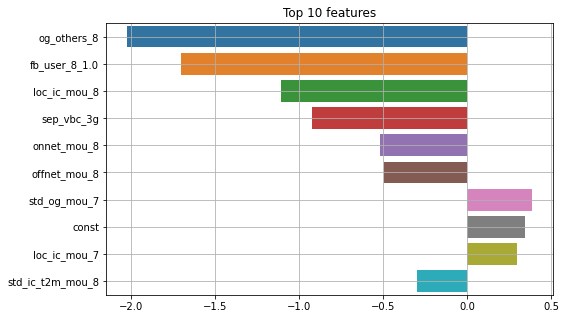

In [168]:
# Bar plot for top 10 features and thier coefficients

plt.figure(figsize=(8,5))
sns.barplot(x = res.params[top_10], y =  res.params[top_10].index,)
plt.title('Top 10 features')
plt.grid()
plt.show()

##### Inference from our Interpretable Model -:


<font color = purple> 

 1. We can see that `og_others_8` has highest coefficient among all variables, with it being related negatively to our target variable, i.e the more outgoing calls are made in action phase or 8th month, the less is likelihood of churning.
 
    
2. Also the customers who have opted for Facebook service scheme during action month are less likely to churn.
 
    
3. Local Incoming calls during action month are also good predictor of telling about the likelihood of churning, as it can be seen that more local calls means lower chance of churning.
 
    
4. In September month if the volume based cost for 3g usage is more per person they most likely won't churn in the future.

    
5. Both the on network and off network calls during action month are directly related to not-churned customers, i.e the more are these calls made more likely is the customer to refrain from churning.    

    
6. STD outgoing calls made during the action months have positive dependency on customer's chances of churning, i.e higher the number of such calls are made more likely is the customer to churn.

    
7. Local Incoming calls during second part of good phase also have positive dependency on customer's chances of churning.

    
8. STD incoming calls from operator T to other mobile has positive relation in refraining the customer from churning.
</font> 

##### Recommendations from our Interpretable Model -:


<font color = purple> 

1. Facebook services needs to be pushed to the user more, since the more they are utilized the higher are the chances of refraining the customer from churning.
 
    
2. Customers must be given some incentive to place more outgoing calls as we have seen that the more are such calls placed lower becomes the likelihood of churning.
  
    
3. If various incentives are provided by partnering with various popular 3rd party apps such that if user were to use the mobile number from this telecom as point of contact, they would be given some discounts or voucher on those apps, this tactic would indirectly increase the number of calls both incoming and outgoing, whilst also increasing the usage of mobile number thereby reducing the chances of churn.

    
4. Also the above tactic can be pushed to more local and small business around the areas where churn rate is quite high.
</font> 

### 6. Logistic Regression with PCA

Now let us build a simple logistic regression model with PCA, for improved performance.

In [169]:
lm_pca = LogisticRegression(C=1e9)                 # Using the class LogisticRegression we will build a function

lm_pca.fit(X_train_pca, y_train)                   # applying function on our train and test datasets


LogisticRegression(C=1000000000.0)

###### Making predictions

In [170]:
y_pred = lm_pca.predict(X_test_pca)   # Storing predictions in a variable


y_pred_df = pd.DataFrame(y_pred)      # Creating dataframe of variables

In [171]:
# Making confusion matrix

c_matrix = metrics.confusion_matrix(y_test,y_pred)
c_matrix 

array([[6666, 1582],
       [ 117,  621]], dtype=int64)

In [172]:
# Accuracy

metrics.accuracy_score(y_test,y_pred)

0.8109281103939462

In [173]:
TP = c_matrix[1,1] # true positive 
TN = c_matrix[0,0] # true negatives
FP = c_matrix[0,1] # false positives
FN = c_matrix[1,0] # false negatives

In [174]:
# Sensitivity

TP / float(TP+FN)

0.8414634146341463

###### Performance on test :-


Accuracy :     81%

Sensitivity :   84%


###### Summary of Logistic Regression with PCA

As we can notice that we have received a huge boost in accuracy of our model, with very little decrease in sensitivity without losing much features.

### 7. Random Forest

Now lets build another high performance model using Random Forest

In [175]:
# Importing relevant library

from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import GridSearchCV  # Importing grid search CV


from sklearn.metrics import classification_report     # Importing Classification report


rfc_basic = RandomForestClassifier(random_state=42)

rfc_basic.fit(X_train_pca,y_train)

RandomForestClassifier(random_state=42)

###### Making predictions

In [176]:
pred_train = rfc_basic.predict(X_train_pca)

print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19272
           1       1.00      1.00      1.00     19272

    accuracy                           1.00     38544
   macro avg       1.00      1.00      1.00     38544
weighted avg       1.00      1.00      1.00     38544



A perfect accuracy and recall/sensitivity in train model is a sign of overfitting, let us analyze the test model for confirmation.

In [177]:
pred_test = rfc_basic.predict(X_test_pca)

print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      8248
           1       0.60      0.24      0.34       738

    accuracy                           0.92      8986
   macro avg       0.77      0.61      0.65      8986
weighted avg       0.91      0.92      0.91      8986



Test-Recall or test-sensitivity for this model is 24% which is very low, it indicates that this model is over fitting tremendously so let us find best parameters using grid search CV, to get desired sensitivity without over fitting.

###### Using GridSearchCV to find best hyperparameters to tune the model for

In [178]:
# Creating the list of parameters to tune the model 


para = {
    'max_depth': [1,5,10],
    'max_features': [5,10],
    'min_samples_leaf': range(50, 300, 150,),
    'min_samples_split': range(100, 500, 200),
    'n_estimators': [100,200,400]
       }
# Creating a Random forest model

rfc = RandomForestClassifier()


# Initializing components of grid search with parameters


g_search = GridSearchCV(estimator = rfc, param_grid = para, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [179]:
g_search.fit(X_train_pca, y_train)  # Running Gridsearch

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  2.7min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(50, 300, 150),
                         'min_samples_split': range(100, 500, 200),
                         'n_estimators': [100, 200, 400]},
             verbose=1)

In [180]:
g_search.best_score_   # Checking best score of our gridsearch

0.8873754669987547

In [181]:
g_search.best_params_   # Checking best parameters

{'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 400}

In [182]:
# Making a Random Forest model with the best parameters


rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             max_features=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             n_estimators=200,
                            random_state=42)

In [183]:
# Making the model fit

rfc.fit(X_train_pca,y_train)

RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=200,
                       random_state=42)

###### Making predictions

In [184]:
y_test_pred = rfc.predict(X_test_pca)                  # Predicting at defualt threshold of 0.5

print(classification_report(y_test, y_test_pred))                 # Printing the new classification report

              precision    recall  f1-score   support

           0       0.97      0.90      0.94      8248
           1       0.40      0.71      0.51       738

    accuracy                           0.89      8986
   macro avg       0.68      0.81      0.72      8986
weighted avg       0.92      0.89      0.90      8986



We can see that sensitivity is quite low although accuracy is very high, so let us adjust threshold is such a manner that we can gain some sensitivity without losing much of accuracy or any other metric.

In [185]:
# Specifying a threshold at 0.4 to increase the sensitivity at a cost of accuracy and precision

y_test_pred_prob = rfc.predict_proba(X_test_pca)

y_test_pred = (y_test_pred_prob [:,1] >= 0.4).astype('int')

print(classification_report(y_test, y_test_pred)) # Printing the new classification report

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      8248
           1       0.28      0.83      0.42       738

    accuracy                           0.81      8986
   macro avg       0.63      0.82      0.65      8986
weighted avg       0.92      0.81      0.85      8986



###### Performance on test :-


Accuracy :     81%

Sensitivity/Recall :   83%


###### Summary of Random Forest with PCA

As we can notice that we have received a huge boost in accuracy of our model, with very little decrease in sensitivity without losing much features. and this result is completely on par with Logistic Regression with PCA.

### 8. XG Boost

Now lets build another high performance model using XG boost

In [186]:
# Importing relevant libraries

import xgboost as xgb
from xgboost import XGBClassifier

In [187]:
# Creating an XG boost model with default parameters


Xb = XGBClassifier(random_state = 42, eval_metric='error' )

Xb.fit(X_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=20,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

###### Making predictions

In [188]:
pred_train = Xb.predict(X_train_pca)

print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19272
           1       1.00      1.00      1.00     19272

    accuracy                           1.00     38544
   macro avg       1.00      1.00      1.00     38544
weighted avg       1.00      1.00      1.00     38544



A perfect accuracy and recall/sensitivity in train model is a sign of overfitting, let us analyze the test model for confirmation.

In [189]:
pred_test = Xb.predict(X_test_pca)

print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      8248
           1       0.52      0.49      0.50       738

    accuracy                           0.92      8986
   macro avg       0.74      0.72      0.73      8986
weighted avg       0.92      0.92      0.92      8986



Test-Recall or test-sensitivity for this model is 49% which is very low, it indicates that this model is over fitting tremendously so let us find best parameters using grid search CV, to get desired sensitivity without over fitting.

###### Using GridSearchCV to find best hyperparameters to tune the model for

In [190]:
# Hyperparameters to tune for

para = { 'learning_rate': [0.2, 0.6], 
         'subsample': [0.3, 0.6],
         'max_depth': [5,10],
         'min_child_weight':[1,2],
         'n_estimators': [100,200,400]
       }          


# specify model
Xb = XGBClassifier(random_state = 42,eval_metric='error')

# set up GridSearchCV()
g_search = GridSearchCV(estimator = Xb, 
                        param_grid = para, 
                        cv = 3, 
                        verbose = 1,
                        return_train_score=True,
                        n_jobs = -1)      


In [191]:
g_search.fit(X_train_pca,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  6.4min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, eval_metric='error',
                                     gamma=None, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_e...s=None,
                                     num_parallel_tree=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
               

In [192]:
g_search.best_score_   # Checking best score of our gridsearch

0.9811643835616438

In [193]:
g_search.best_params_   # Checking best parameters

{'learning_rate': 0.2,
 'max_depth': 10,
 'min_child_weight': 1,
 'n_estimators': 400,
 'subsample': 0.6}

In [194]:
para = {'learning_rate': 0.2,
        'max_depth': 10, 
        'n_estimators':400,
        'min_child_weight':1,
        'subsample': 0.6
         }

# fit model on training data

Xb = XGBClassifier(learning_rate= 0.2,
                    max_depth= 10, 
                    n_estimators=400,
                    min_child_weight=1,
                    subsample= 0.6,
                    eval_metric='error',
                    random_state=42, 
                    verbosity = 1,
                    n_jobs = -1)


Xb.fit(X_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=-1,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.6, tree_method='exact',
              validate_parameters=1, verbosity=1)

###### Making predictions

In [195]:
y_test_pred = Xb.predict(X_test_pca)                  # Predicting at defualt threshold of 0.5

print(classification_report(y_test, y_test_pred))                 # Printing the classification report

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      8248
           1       0.62      0.42      0.50       738

    accuracy                           0.93      8986
   macro avg       0.79      0.70      0.73      8986
weighted avg       0.92      0.93      0.93      8986



We can see that sensitivity is quite low although accuracy is very high, so let us adjust threshold is such a manner that we can gain some sensitivity without losing much of accuracy or any other metric.

In [196]:
# Specifying a threshold at 0.1 to increase the sensitivity at a cost of accuracy and precision

y_test_pred_prob = Xb.predict_proba(X_test_pca)

y_test_pred = (y_test_pred_prob [:,1] >= 0.003).astype('int')

print(classification_report(y_test, y_test_pred)) # Printing the new classification report

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8248
           1       0.29      0.83      0.43       738

    accuracy                           0.82      8986
   macro avg       0.64      0.82      0.66      8986
weighted avg       0.93      0.82      0.85      8986



Test-Recall or test-sensitivity for this model is 83% , combined with a good accuracy of 82% we have built a high performance model.

###### Performance on test :-


Accuracy :     82%

Sensitivity/Recall :   83%


###### Summary of XGBoost with PCA

As we can notice that we have a decent accuracy and sensitivity.

### 9. Comparing all model's test accuracy and sensitivity/ recall

#### 9.1  Logistic regression model without PCA

Accuracy :     54%

Sensitivity :   86%

#### 9.2  Logistic regression model with PCA

Accuracy :     81%

Sensitivity :   84%

#### 9.3  Random Forest with PCA

Accuracy :     81%

Sensitivity/Recall :   83%

#### 9.4  XGBoost with PCA

Accuracy :     82%

Sensitivity/Recall :   83%

###### Comprehension from interpretable model

The interpretable model did not do a decent job, although it did gave a very good sensitivity score but it was achieved at the cost of compromising in the score for accuracy which is very poor, although it did gave us a feel of important features, their effect on our target variable and their significance regarding the same.

In [197]:
# Those important features are -:

[i for i in top_10]

['og_others_8',
 'fb_user_8_1.0',
 'loc_ic_mou_8',
 'sep_vbc_3g',
 'onnet_mou_8',
 'offnet_mou_8',
 'std_og_mou_7',
 'const',
 'loc_ic_mou_7',
 'std_ic_t2m_mou_8']

###### Comprehension from high performance models

We can see that nearly all high performance models did a very good job of giving out high recall/sensitivity, without letting accuracy drop significantly. All their performances are nearly identical